# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [25]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

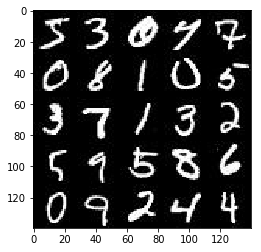

In [26]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

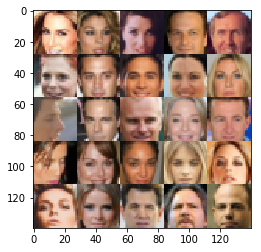

In [27]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [28]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.1


C:\Users\amit\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [29]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input = tf.placeholder(tf.float32, shape=(None, image_height, image_width, image_channels))
    z_input = tf.placeholder(tf.float32, shape=(None, z_dim))
    learning_rate = tf.placeholder(tf.float32, shape=())

    return real_input, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [30]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.1
        
    with tf.variable_scope('discriminator', reuse=reuse):
     
        conv_layer1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        conv_layer1r = tf.maximum(alpha * conv_layer1, conv_layer1)
        
       
        conv_layer2 = tf.layers.conv2d(conv_layer1r, 128, 5, strides=2, padding='same')
        conv_layer2n = tf.layers.batch_normalization(conv_layer2, training=True)
        conv_layer2r = tf.maximum(alpha * conv_layer2n, conv_layer2n)
        
       
        conv_layer3 = tf.layers.conv2d(conv_layer2r, 256, 5, strides=2, padding='same')
        conv_layer3n = tf.layers.batch_normalization(conv_layer3, training=True)
        conv_layer3r = tf.maximum(alpha * conv_layer3n, conv_layer3n)
        
       
        conv_layer4 = tf.layers.conv2d(conv_layer3r, 512, 5, strides=2, padding='same')
        conv_layer4n = tf.layers.batch_normalization(conv_layer4, training=True)
        conv_layer4r = tf.maximum(alpha * conv_layer4n, conv_layer4n)
                
       
        reshape_layer = tf.reshape(conv_layer4r,(-1, 8 * 64 * 2 * 2))
        
       
        logits_val = tf.layers.dense(reshape_layer, 1)
        
       
        out_val = tf.sigmoid(logits_val)
     

    return out_val, logits_val


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [31]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.1
    
    with tf.variable_scope('generator', reuse=not(is_train)):
                
        fully_connected = tf.layers.dense(z, 7*7*112)
        fully_connected = tf.reshape(fully_connected, (-1, 7, 7, 112))
        fully_connected = tf.layers.batch_normalization(fully_connected, training=is_train)
        fully_connected = tf.maximum(alpha*fully_connected, fully_connected)
        
        conv_layer1 = tf.layers.conv2d_transpose(fully_connected, 56, 5, 2, 'SAME')
        conv_layer1 = tf.layers.batch_normalization(conv_layer1, training=is_train)
        conv_layer1 = tf.maximum(alpha*conv_layer1, conv_layer1)
        
        conv_layer2 = tf.layers.conv2d_transpose(conv_layer1, out_channel_dim, 5, 2, 'SAME')
        out_val = tf.tanh(conv_layer2)

    return out_val


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [32]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
        

    gen_model = generator(input_z, out_channel_dim)
    
    des_output_real, des_logits_real = discriminator(input_real)
    
    des_output_fake, des_logits_fake = discriminator(gen_model, reuse=True)
    
    
    des_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=des_logits_real, 
                                                                         labels=tf.ones_like(des_output_real)))
    
    des_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=des_logits_fake, 
                                                                         labels=tf.zeros_like(des_output_fake)))
    
    
    des_loss = des_loss_real + des_loss_fake
    
    ges_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=des_logits_fake, 
                                                     labels=tf.ones_like(des_output_fake)))
    
    return des_loss, ges_loss
   
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [33]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    temp_vars = tf.trainable_variables()
    
    des_vars = [var_des for var_des in temp_vars if var_des.name.startswith('discriminator')]
    
    ges_vars = [var_ges for var_ges in temp_vars if var_ges.name.startswith('generator')]

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        des_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=des_vars)
        ges_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=ges_vars)

    return des_train_opt, ges_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [34]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [35]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    _, img_width_val, img_height_val, img_channels_val = data_shape
    
    real_input_val, z_input_val, learning_r = model_inputs(img_width_val, img_height_val, img_channels_val, z_dim)
    
    des_loss, ges_loss = model_loss(real_input_val, z_input_val, img_channels_val)
    
    des_opt, ges_opt = model_opt(des_loss, ges_loss, learning_rate, beta1)
    
    steps_val = 0
    
    print_every_val = 10
    
    show_every_val = 100
    
    losses_val = []
    
    n_images_val = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_img in get_batches(batch_size):
                
                steps_val += 1
    
                batch_img *= 2.0
                
                z_sample_val = np.random.uniform(-1, 1, (batch_size, z_dim))
                
                _ = sess.run(des_opt, feed_dict={
                        real_input_val: batch_img, z_input_val: z_sample_val, learning_r: learning_rate})
                _ = sess.run(ges_opt, feed_dict={
                        real_input_val: batch_img, z_input_val: z_sample_val, learning_r: learning_rate})
                
                if steps_val % print_every_val == 0:
                    train_loss_des = des_loss.eval({z_input_val: z_sample_val, real_input_val: batch_img})
                    train_loss_ges = ges_loss.eval({z_input_val: z_sample_val})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_des),
                          "Generator Loss: {:.4f}".format(train_loss_ges))
                    losses_val.append((train_loss_des, train_loss_ges))
                
                if steps_val % show_every_val == 0:
                    show_generator_output(sess, n_images_val, z_input_val, img_channels_val, data_image_mode) 
                    

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.7514... Generator Loss: 1.6556
Epoch 1/2... Discriminator Loss: 1.3675... Generator Loss: 1.3067
Epoch 1/2... Discriminator Loss: 2.1354... Generator Loss: 3.6869
Epoch 1/2... Discriminator Loss: 0.9592... Generator Loss: 0.7623
Epoch 1/2... Discriminator Loss: 1.6428... Generator Loss: 0.3775
Epoch 1/2... Discriminator Loss: 1.6725... Generator Loss: 0.4515
Epoch 1/2... Discriminator Loss: 3.8712... Generator Loss: 0.0240
Epoch 1/2... Discriminator Loss: 1.0756... Generator Loss: 0.9278
Epoch 1/2... Discriminator Loss: 1.0119... Generator Loss: 1.6582
Epoch 1/2... Discriminator Loss: 2.3726... Generator Loss: 2.9263


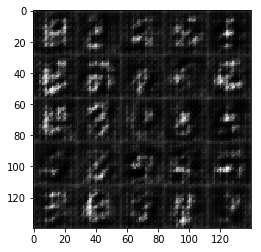

Epoch 1/2... Discriminator Loss: 1.3280... Generator Loss: 0.5938
Epoch 1/2... Discriminator Loss: 1.4047... Generator Loss: 0.5420
Epoch 1/2... Discriminator Loss: 1.0883... Generator Loss: 1.1968
Epoch 1/2... Discriminator Loss: 1.3939... Generator Loss: 0.6526
Epoch 1/2... Discriminator Loss: 1.2898... Generator Loss: 0.5988
Epoch 1/2... Discriminator Loss: 1.3592... Generator Loss: 0.4902
Epoch 1/2... Discriminator Loss: 2.3131... Generator Loss: 0.2192
Epoch 1/2... Discriminator Loss: 2.6271... Generator Loss: 0.1168
Epoch 1/2... Discriminator Loss: 1.4070... Generator Loss: 0.3935
Epoch 1/2... Discriminator Loss: 1.0500... Generator Loss: 0.6104


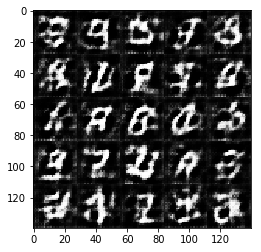

Epoch 1/2... Discriminator Loss: 2.2413... Generator Loss: 0.1578
Epoch 1/2... Discriminator Loss: 1.4407... Generator Loss: 0.3744
Epoch 1/2... Discriminator Loss: 1.8685... Generator Loss: 0.2184
Epoch 1/2... Discriminator Loss: 0.5953... Generator Loss: 1.2510
Epoch 1/2... Discriminator Loss: 2.4898... Generator Loss: 0.1153
Epoch 1/2... Discriminator Loss: 1.1462... Generator Loss: 0.7076
Epoch 1/2... Discriminator Loss: 2.2056... Generator Loss: 0.2746
Epoch 1/2... Discriminator Loss: 1.6293... Generator Loss: 0.2676
Epoch 1/2... Discriminator Loss: 1.7242... Generator Loss: 0.2707
Epoch 1/2... Discriminator Loss: 2.3052... Generator Loss: 0.1485


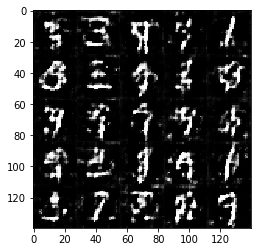

Epoch 1/2... Discriminator Loss: 1.3768... Generator Loss: 0.4119
Epoch 1/2... Discriminator Loss: 1.9617... Generator Loss: 1.7663
Epoch 1/2... Discriminator Loss: 1.7242... Generator Loss: 0.2830
Epoch 1/2... Discriminator Loss: 1.2997... Generator Loss: 0.5073
Epoch 1/2... Discriminator Loss: 1.2888... Generator Loss: 0.4553
Epoch 1/2... Discriminator Loss: 1.1375... Generator Loss: 2.6894
Epoch 1/2... Discriminator Loss: 2.3207... Generator Loss: 0.1650
Epoch 1/2... Discriminator Loss: 1.8324... Generator Loss: 0.3147
Epoch 1/2... Discriminator Loss: 1.4985... Generator Loss: 0.4399
Epoch 1/2... Discriminator Loss: 0.9967... Generator Loss: 2.0683


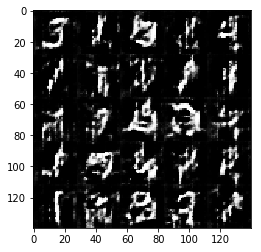

Epoch 1/2... Discriminator Loss: 1.9651... Generator Loss: 0.2824
Epoch 1/2... Discriminator Loss: 1.1586... Generator Loss: 0.5248
Epoch 1/2... Discriminator Loss: 1.5292... Generator Loss: 0.3365
Epoch 1/2... Discriminator Loss: 1.9551... Generator Loss: 0.2495
Epoch 1/2... Discriminator Loss: 2.0486... Generator Loss: 0.1706
Epoch 1/2... Discriminator Loss: 3.5675... Generator Loss: 6.0587
Epoch 1/2... Discriminator Loss: 0.9730... Generator Loss: 0.7764
Epoch 1/2... Discriminator Loss: 2.9777... Generator Loss: 0.0863
Epoch 1/2... Discriminator Loss: 1.5502... Generator Loss: 0.3456
Epoch 1/2... Discriminator Loss: 1.4887... Generator Loss: 0.3641


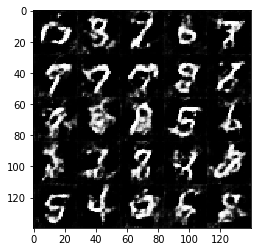

Epoch 1/2... Discriminator Loss: 2.2542... Generator Loss: 0.1593
Epoch 1/2... Discriminator Loss: 0.8681... Generator Loss: 1.1714
Epoch 1/2... Discriminator Loss: 2.6859... Generator Loss: 0.1066
Epoch 1/2... Discriminator Loss: 1.8553... Generator Loss: 0.2704
Epoch 1/2... Discriminator Loss: 1.0917... Generator Loss: 0.5485
Epoch 1/2... Discriminator Loss: 2.0507... Generator Loss: 0.1736
Epoch 1/2... Discriminator Loss: 1.1188... Generator Loss: 0.8905
Epoch 1/2... Discriminator Loss: 0.4689... Generator Loss: 1.6936
Epoch 1/2... Discriminator Loss: 1.7807... Generator Loss: 4.2467
Epoch 1/2... Discriminator Loss: 2.1847... Generator Loss: 0.1875


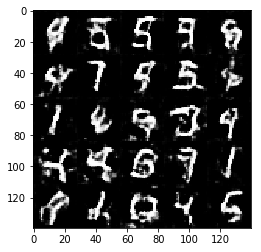

Epoch 1/2... Discriminator Loss: 1.4445... Generator Loss: 0.3532
Epoch 1/2... Discriminator Loss: 3.2418... Generator Loss: 0.0638
Epoch 1/2... Discriminator Loss: 1.2873... Generator Loss: 0.4267
Epoch 1/2... Discriminator Loss: 1.7872... Generator Loss: 2.0921
Epoch 1/2... Discriminator Loss: 0.7677... Generator Loss: 0.8423
Epoch 1/2... Discriminator Loss: 0.4663... Generator Loss: 2.1219
Epoch 1/2... Discriminator Loss: 4.1516... Generator Loss: 0.0233
Epoch 1/2... Discriminator Loss: 2.4284... Generator Loss: 0.1240
Epoch 1/2... Discriminator Loss: 3.1476... Generator Loss: 0.0928
Epoch 1/2... Discriminator Loss: 0.9932... Generator Loss: 0.7098


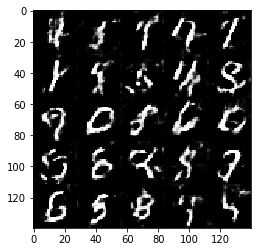

Epoch 1/2... Discriminator Loss: 1.4290... Generator Loss: 0.3414
Epoch 1/2... Discriminator Loss: 1.4388... Generator Loss: 0.5177
Epoch 1/2... Discriminator Loss: 3.3981... Generator Loss: 0.0950
Epoch 1/2... Discriminator Loss: 1.5000... Generator Loss: 3.0185
Epoch 1/2... Discriminator Loss: 0.9727... Generator Loss: 0.6370
Epoch 1/2... Discriminator Loss: 0.7807... Generator Loss: 0.7829
Epoch 1/2... Discriminator Loss: 2.0614... Generator Loss: 0.1851
Epoch 1/2... Discriminator Loss: 0.7081... Generator Loss: 1.8209
Epoch 1/2... Discriminator Loss: 1.3647... Generator Loss: 0.4729
Epoch 1/2... Discriminator Loss: 3.2475... Generator Loss: 0.0804


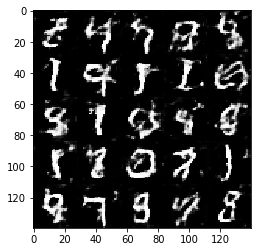

Epoch 1/2... Discriminator Loss: 1.4644... Generator Loss: 0.3864
Epoch 1/2... Discriminator Loss: 1.7766... Generator Loss: 0.2969
Epoch 1/2... Discriminator Loss: 0.6757... Generator Loss: 0.9238
Epoch 1/2... Discriminator Loss: 0.6995... Generator Loss: 1.1668
Epoch 1/2... Discriminator Loss: 0.4707... Generator Loss: 1.5242
Epoch 1/2... Discriminator Loss: 2.9297... Generator Loss: 0.0857
Epoch 1/2... Discriminator Loss: 3.0168... Generator Loss: 0.0633
Epoch 1/2... Discriminator Loss: 3.8031... Generator Loss: 0.0275
Epoch 1/2... Discriminator Loss: 1.9896... Generator Loss: 0.2161
Epoch 1/2... Discriminator Loss: 0.7177... Generator Loss: 0.9263


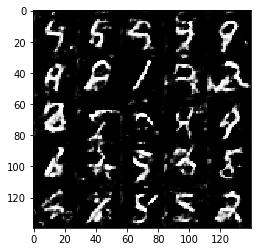

Epoch 1/2... Discriminator Loss: 1.9142... Generator Loss: 0.3758
Epoch 1/2... Discriminator Loss: 1.5904... Generator Loss: 0.3913
Epoch 1/2... Discriminator Loss: 1.9924... Generator Loss: 0.2599
Epoch 1/2... Discriminator Loss: 2.1845... Generator Loss: 0.1924
Epoch 1/2... Discriminator Loss: 1.1562... Generator Loss: 0.6460
Epoch 1/2... Discriminator Loss: 0.7523... Generator Loss: 0.8901
Epoch 1/2... Discriminator Loss: 1.4240... Generator Loss: 0.4765
Epoch 1/2... Discriminator Loss: 1.4677... Generator Loss: 0.4052
Epoch 1/2... Discriminator Loss: 1.0834... Generator Loss: 0.6021
Epoch 1/2... Discriminator Loss: 2.4620... Generator Loss: 0.1342


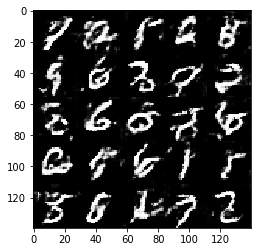

Epoch 1/2... Discriminator Loss: 1.0559... Generator Loss: 0.5773
Epoch 1/2... Discriminator Loss: 1.1689... Generator Loss: 0.7457
Epoch 1/2... Discriminator Loss: 0.5679... Generator Loss: 1.4526
Epoch 1/2... Discriminator Loss: 2.8384... Generator Loss: 0.0883
Epoch 1/2... Discriminator Loss: 0.2010... Generator Loss: 2.3755
Epoch 1/2... Discriminator Loss: 0.7326... Generator Loss: 1.4080
Epoch 1/2... Discriminator Loss: 1.2204... Generator Loss: 0.5499
Epoch 1/2... Discriminator Loss: 0.9819... Generator Loss: 0.7313
Epoch 1/2... Discriminator Loss: 1.1004... Generator Loss: 0.5783
Epoch 1/2... Discriminator Loss: 1.7958... Generator Loss: 0.3632


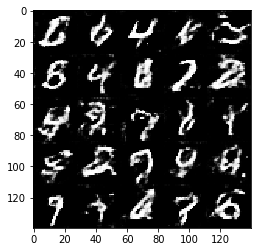

Epoch 1/2... Discriminator Loss: 2.1758... Generator Loss: 0.1806
Epoch 1/2... Discriminator Loss: 1.3718... Generator Loss: 0.4291
Epoch 1/2... Discriminator Loss: 0.6533... Generator Loss: 1.3027
Epoch 1/2... Discriminator Loss: 2.2150... Generator Loss: 0.3737
Epoch 1/2... Discriminator Loss: 1.2768... Generator Loss: 0.5795
Epoch 1/2... Discriminator Loss: 3.5330... Generator Loss: 0.0767
Epoch 1/2... Discriminator Loss: 2.7594... Generator Loss: 0.1355
Epoch 1/2... Discriminator Loss: 2.7650... Generator Loss: 0.1392
Epoch 1/2... Discriminator Loss: 2.3581... Generator Loss: 0.1983
Epoch 1/2... Discriminator Loss: 0.8435... Generator Loss: 0.9737


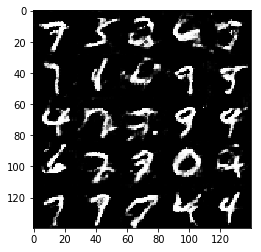

Epoch 1/2... Discriminator Loss: 0.1546... Generator Loss: 3.3579
Epoch 1/2... Discriminator Loss: 2.3392... Generator Loss: 5.5070
Epoch 1/2... Discriminator Loss: 3.4759... Generator Loss: 0.0399
Epoch 1/2... Discriminator Loss: 0.8894... Generator Loss: 0.7577
Epoch 1/2... Discriminator Loss: 0.7444... Generator Loss: 0.8840
Epoch 1/2... Discriminator Loss: 3.0200... Generator Loss: 0.0822
Epoch 1/2... Discriminator Loss: 1.4455... Generator Loss: 0.3990
Epoch 1/2... Discriminator Loss: 2.1605... Generator Loss: 0.2551
Epoch 1/2... Discriminator Loss: 2.1228... Generator Loss: 0.1990
Epoch 1/2... Discriminator Loss: 2.6689... Generator Loss: 0.1148


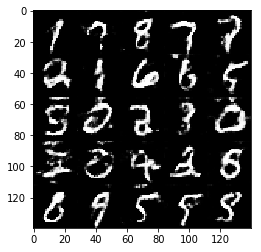

Epoch 1/2... Discriminator Loss: 0.1881... Generator Loss: 4.2979
Epoch 1/2... Discriminator Loss: 2.2600... Generator Loss: 0.2239
Epoch 1/2... Discriminator Loss: 1.3088... Generator Loss: 0.3894
Epoch 1/2... Discriminator Loss: 0.4274... Generator Loss: 3.0653
Epoch 1/2... Discriminator Loss: 1.9227... Generator Loss: 0.2266
Epoch 1/2... Discriminator Loss: 3.2686... Generator Loss: 0.0739
Epoch 1/2... Discriminator Loss: 2.7341... Generator Loss: 0.0887
Epoch 1/2... Discriminator Loss: 0.4686... Generator Loss: 1.4194
Epoch 1/2... Discriminator Loss: 0.9152... Generator Loss: 0.9360
Epoch 1/2... Discriminator Loss: 3.6806... Generator Loss: 0.0597


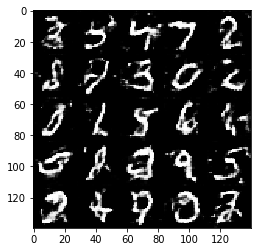

Epoch 1/2... Discriminator Loss: 0.4461... Generator Loss: 1.8679
Epoch 1/2... Discriminator Loss: 1.0852... Generator Loss: 0.6076
Epoch 1/2... Discriminator Loss: 4.8330... Generator Loss: 0.0233
Epoch 1/2... Discriminator Loss: 1.3768... Generator Loss: 0.4426
Epoch 1/2... Discriminator Loss: 2.5312... Generator Loss: 0.1607
Epoch 1/2... Discriminator Loss: 0.7710... Generator Loss: 1.0171
Epoch 1/2... Discriminator Loss: 0.8368... Generator Loss: 0.8083
Epoch 1/2... Discriminator Loss: 1.1236... Generator Loss: 0.5452
Epoch 1/2... Discriminator Loss: 5.2306... Generator Loss: 10.2851
Epoch 1/2... Discriminator Loss: 0.6710... Generator Loss: 1.7538


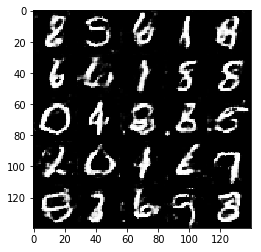

Epoch 1/2... Discriminator Loss: 3.5535... Generator Loss: 0.0460
Epoch 1/2... Discriminator Loss: 0.7377... Generator Loss: 0.8451
Epoch 1/2... Discriminator Loss: 0.2111... Generator Loss: 2.6055
Epoch 1/2... Discriminator Loss: 0.6975... Generator Loss: 1.0515
Epoch 1/2... Discriminator Loss: 0.8333... Generator Loss: 0.8232
Epoch 1/2... Discriminator Loss: 1.6141... Generator Loss: 0.4601
Epoch 1/2... Discriminator Loss: 1.8426... Generator Loss: 0.3849
Epoch 1/2... Discriminator Loss: 2.1661... Generator Loss: 0.2178
Epoch 1/2... Discriminator Loss: 1.6354... Generator Loss: 0.3444
Epoch 1/2... Discriminator Loss: 1.9660... Generator Loss: 0.3214


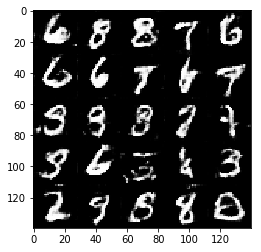

Epoch 1/2... Discriminator Loss: 1.2266... Generator Loss: 0.6529
Epoch 1/2... Discriminator Loss: 1.6219... Generator Loss: 0.3413
Epoch 1/2... Discriminator Loss: 0.3452... Generator Loss: 2.4403
Epoch 1/2... Discriminator Loss: 1.3085... Generator Loss: 0.6645
Epoch 1/2... Discriminator Loss: 1.1473... Generator Loss: 0.4926
Epoch 1/2... Discriminator Loss: 0.3058... Generator Loss: 2.7244
Epoch 1/2... Discriminator Loss: 0.7507... Generator Loss: 0.8233
Epoch 1/2... Discriminator Loss: 1.1309... Generator Loss: 0.4861
Epoch 1/2... Discriminator Loss: 1.1660... Generator Loss: 0.5599
Epoch 1/2... Discriminator Loss: 0.7095... Generator Loss: 0.8814


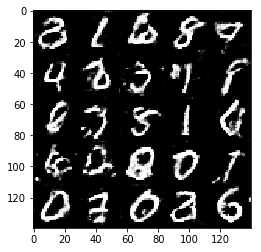

Epoch 1/2... Discriminator Loss: 2.1616... Generator Loss: 0.2786
Epoch 1/2... Discriminator Loss: 2.1360... Generator Loss: 0.3419
Epoch 1/2... Discriminator Loss: 1.2587... Generator Loss: 0.4248
Epoch 1/2... Discriminator Loss: 0.3566... Generator Loss: 1.8008
Epoch 1/2... Discriminator Loss: 2.0401... Generator Loss: 0.2609
Epoch 1/2... Discriminator Loss: 1.0342... Generator Loss: 1.4747
Epoch 1/2... Discriminator Loss: 1.4736... Generator Loss: 0.4647
Epoch 1/2... Discriminator Loss: 0.4832... Generator Loss: 1.2600
Epoch 1/2... Discriminator Loss: 2.1413... Generator Loss: 0.2693
Epoch 1/2... Discriminator Loss: 1.0216... Generator Loss: 0.6089


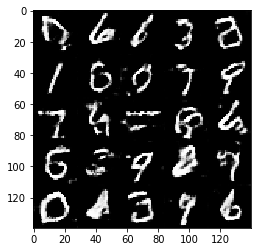

Epoch 1/2... Discriminator Loss: 0.3199... Generator Loss: 1.9002
Epoch 1/2... Discriminator Loss: 1.1158... Generator Loss: 0.6300
Epoch 1/2... Discriminator Loss: 4.5421... Generator Loss: 0.0229
Epoch 1/2... Discriminator Loss: 0.7117... Generator Loss: 1.3327
Epoch 1/2... Discriminator Loss: 0.9183... Generator Loss: 0.8205
Epoch 1/2... Discriminator Loss: 0.6668... Generator Loss: 1.4439
Epoch 1/2... Discriminator Loss: 2.0034... Generator Loss: 0.2188
Epoch 2/2... Discriminator Loss: 1.0108... Generator Loss: 0.6548
Epoch 2/2... Discriminator Loss: 1.3702... Generator Loss: 0.6103
Epoch 2/2... Discriminator Loss: 1.3097... Generator Loss: 0.4526


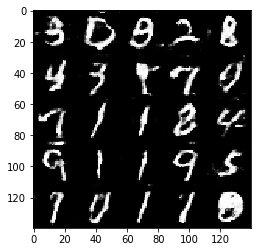

Epoch 2/2... Discriminator Loss: 2.2500... Generator Loss: 0.2280
Epoch 2/2... Discriminator Loss: 1.2868... Generator Loss: 0.7899
Epoch 2/2... Discriminator Loss: 2.1401... Generator Loss: 0.2087
Epoch 2/2... Discriminator Loss: 3.1798... Generator Loss: 0.1228
Epoch 2/2... Discriminator Loss: 0.8650... Generator Loss: 4.9566
Epoch 2/2... Discriminator Loss: 1.7725... Generator Loss: 0.3729
Epoch 2/2... Discriminator Loss: 3.2892... Generator Loss: 0.0723
Epoch 2/2... Discriminator Loss: 0.9819... Generator Loss: 0.7130
Epoch 2/2... Discriminator Loss: 0.9861... Generator Loss: 0.8425
Epoch 2/2... Discriminator Loss: 1.8490... Generator Loss: 0.3308


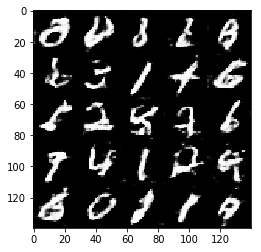

Epoch 2/2... Discriminator Loss: 1.8698... Generator Loss: 0.3866
Epoch 2/2... Discriminator Loss: 2.5533... Generator Loss: 0.2161
Epoch 2/2... Discriminator Loss: 0.9782... Generator Loss: 1.8690
Epoch 2/2... Discriminator Loss: 1.3518... Generator Loss: 0.6068
Epoch 2/2... Discriminator Loss: 1.5308... Generator Loss: 0.3852
Epoch 2/2... Discriminator Loss: 0.5392... Generator Loss: 1.3500
Epoch 2/2... Discriminator Loss: 0.2324... Generator Loss: 7.6066
Epoch 2/2... Discriminator Loss: 4.2523... Generator Loss: 0.0327
Epoch 2/2... Discriminator Loss: 0.9088... Generator Loss: 1.2294
Epoch 2/2... Discriminator Loss: 1.9213... Generator Loss: 0.3628


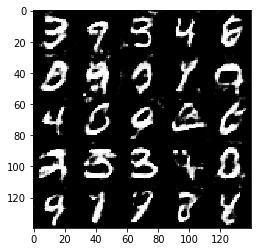

Epoch 2/2... Discriminator Loss: 0.4514... Generator Loss: 1.7813
Epoch 2/2... Discriminator Loss: 2.9803... Generator Loss: 0.2519
Epoch 2/2... Discriminator Loss: 1.1441... Generator Loss: 0.5638
Epoch 2/2... Discriminator Loss: 3.9706... Generator Loss: 0.1082
Epoch 2/2... Discriminator Loss: 4.0062... Generator Loss: 0.0272
Epoch 2/2... Discriminator Loss: 2.6536... Generator Loss: 0.0948
Epoch 2/2... Discriminator Loss: 0.1862... Generator Loss: 2.2468
Epoch 2/2... Discriminator Loss: 3.6427... Generator Loss: 0.0627
Epoch 2/2... Discriminator Loss: 2.1460... Generator Loss: 0.1964
Epoch 2/2... Discriminator Loss: 3.0193... Generator Loss: 0.1099


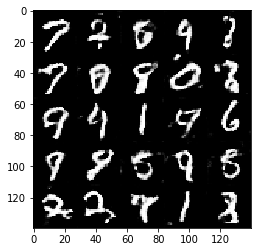

Epoch 2/2... Discriminator Loss: 1.4275... Generator Loss: 0.4990
Epoch 2/2... Discriminator Loss: 0.0870... Generator Loss: 3.2498
Epoch 2/2... Discriminator Loss: 1.6187... Generator Loss: 0.3321
Epoch 2/2... Discriminator Loss: 1.0524... Generator Loss: 0.6443
Epoch 2/2... Discriminator Loss: 0.9371... Generator Loss: 1.0538
Epoch 2/2... Discriminator Loss: 1.1609... Generator Loss: 0.9133
Epoch 2/2... Discriminator Loss: 3.6015... Generator Loss: 0.0900
Epoch 2/2... Discriminator Loss: 4.5314... Generator Loss: 0.0273
Epoch 2/2... Discriminator Loss: 0.3402... Generator Loss: 3.9326
Epoch 2/2... Discriminator Loss: 0.3786... Generator Loss: 1.5851


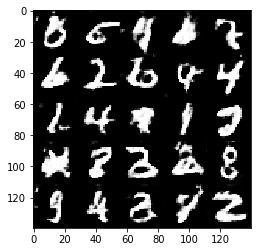

Epoch 2/2... Discriminator Loss: 0.2077... Generator Loss: 3.3106
Epoch 2/2... Discriminator Loss: 0.8021... Generator Loss: 0.9074
Epoch 2/2... Discriminator Loss: 0.4253... Generator Loss: 1.8760
Epoch 2/2... Discriminator Loss: 2.8530... Generator Loss: 0.0891
Epoch 2/2... Discriminator Loss: 0.8221... Generator Loss: 0.9942
Epoch 2/2... Discriminator Loss: 2.8722... Generator Loss: 0.0993
Epoch 2/2... Discriminator Loss: 1.6755... Generator Loss: 0.3622
Epoch 2/2... Discriminator Loss: 1.4340... Generator Loss: 0.4998
Epoch 2/2... Discriminator Loss: 0.6226... Generator Loss: 1.1251
Epoch 2/2... Discriminator Loss: 2.0301... Generator Loss: 0.2947


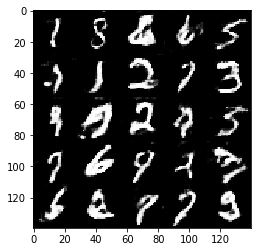

Epoch 2/2... Discriminator Loss: 1.2999... Generator Loss: 0.5040
Epoch 2/2... Discriminator Loss: 4.3057... Generator Loss: 0.0670
Epoch 2/2... Discriminator Loss: 0.1491... Generator Loss: 3.0171
Epoch 2/2... Discriminator Loss: 0.4787... Generator Loss: 5.7094
Epoch 2/2... Discriminator Loss: 1.9158... Generator Loss: 0.2137
Epoch 2/2... Discriminator Loss: 0.0998... Generator Loss: 4.9292
Epoch 2/2... Discriminator Loss: 1.6201... Generator Loss: 0.4876
Epoch 2/2... Discriminator Loss: 0.4962... Generator Loss: 1.7661
Epoch 2/2... Discriminator Loss: 0.7348... Generator Loss: 1.0951
Epoch 2/2... Discriminator Loss: 1.3271... Generator Loss: 0.5132


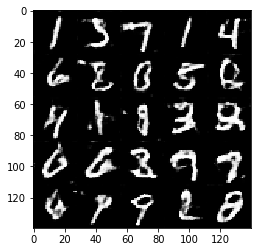

Epoch 2/2... Discriminator Loss: 1.8913... Generator Loss: 0.3302
Epoch 2/2... Discriminator Loss: 0.3533... Generator Loss: 1.7479
Epoch 2/2... Discriminator Loss: 0.4125... Generator Loss: 1.7773
Epoch 2/2... Discriminator Loss: 2.3358... Generator Loss: 0.1431
Epoch 2/2... Discriminator Loss: 3.2556... Generator Loss: 0.0477
Epoch 2/2... Discriminator Loss: 2.1108... Generator Loss: 0.3894
Epoch 2/2... Discriminator Loss: 3.2510... Generator Loss: 0.0719
Epoch 2/2... Discriminator Loss: 0.2890... Generator Loss: 3.4053
Epoch 2/2... Discriminator Loss: 1.7934... Generator Loss: 0.2489
Epoch 2/2... Discriminator Loss: 1.6274... Generator Loss: 0.3849


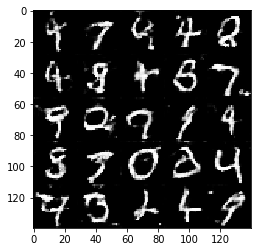

Epoch 2/2... Discriminator Loss: 3.1163... Generator Loss: 0.0776
Epoch 2/2... Discriminator Loss: 2.7911... Generator Loss: 0.1503
Epoch 2/2... Discriminator Loss: 2.4480... Generator Loss: 0.1735
Epoch 2/2... Discriminator Loss: 2.0400... Generator Loss: 0.2232
Epoch 2/2... Discriminator Loss: 4.0905... Generator Loss: 0.0247
Epoch 2/2... Discriminator Loss: 1.7294... Generator Loss: 0.3080
Epoch 2/2... Discriminator Loss: 2.0051... Generator Loss: 0.3074
Epoch 2/2... Discriminator Loss: 1.8839... Generator Loss: 0.4301
Epoch 2/2... Discriminator Loss: 2.3831... Generator Loss: 0.1909
Epoch 2/2... Discriminator Loss: 1.9317... Generator Loss: 0.3637


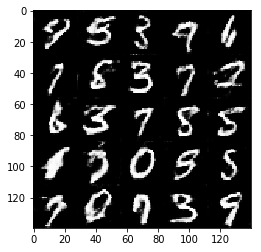

Epoch 2/2... Discriminator Loss: 1.9112... Generator Loss: 0.3772
Epoch 2/2... Discriminator Loss: 0.2485... Generator Loss: 2.2746
Epoch 2/2... Discriminator Loss: 4.0629... Generator Loss: 0.0437
Epoch 2/2... Discriminator Loss: 0.2166... Generator Loss: 2.7689
Epoch 2/2... Discriminator Loss: 0.0868... Generator Loss: 3.1975
Epoch 2/2... Discriminator Loss: 2.9739... Generator Loss: 0.1309
Epoch 2/2... Discriminator Loss: 0.8618... Generator Loss: 1.2239
Epoch 2/2... Discriminator Loss: 0.3565... Generator Loss: 2.7504
Epoch 2/2... Discriminator Loss: 0.3645... Generator Loss: 1.8214
Epoch 2/2... Discriminator Loss: 1.1761... Generator Loss: 0.4917


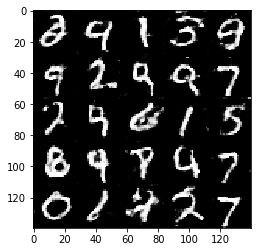

Epoch 2/2... Discriminator Loss: 0.6816... Generator Loss: 1.1999
Epoch 2/2... Discriminator Loss: 2.4032... Generator Loss: 0.3979
Epoch 2/2... Discriminator Loss: 0.5899... Generator Loss: 1.1874
Epoch 2/2... Discriminator Loss: 0.0401... Generator Loss: 4.2710
Epoch 2/2... Discriminator Loss: 2.0156... Generator Loss: 0.2525
Epoch 2/2... Discriminator Loss: 3.1842... Generator Loss: 0.0651
Epoch 2/2... Discriminator Loss: 0.8687... Generator Loss: 1.0868
Epoch 2/2... Discriminator Loss: 0.6927... Generator Loss: 1.0329
Epoch 2/2... Discriminator Loss: 2.4350... Generator Loss: 0.1620
Epoch 2/2... Discriminator Loss: 0.4360... Generator Loss: 1.3748


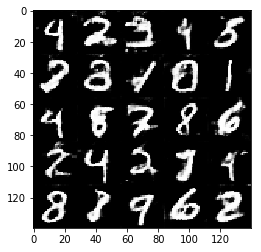

Epoch 2/2... Discriminator Loss: 1.7684... Generator Loss: 0.3253
Epoch 2/2... Discriminator Loss: 1.9270... Generator Loss: 0.2526
Epoch 2/2... Discriminator Loss: 1.2981... Generator Loss: 0.5212
Epoch 2/2... Discriminator Loss: 6.0700... Generator Loss: 0.0056
Epoch 2/2... Discriminator Loss: 0.3620... Generator Loss: 2.0836
Epoch 2/2... Discriminator Loss: 2.3372... Generator Loss: 0.2977
Epoch 2/2... Discriminator Loss: 2.8684... Generator Loss: 0.0887
Epoch 2/2... Discriminator Loss: 1.2765... Generator Loss: 0.5866
Epoch 2/2... Discriminator Loss: 2.3164... Generator Loss: 0.3178
Epoch 2/2... Discriminator Loss: 3.6993... Generator Loss: 0.0952


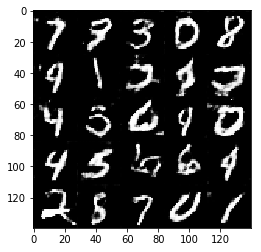

Epoch 2/2... Discriminator Loss: 3.9819... Generator Loss: 0.1266
Epoch 2/2... Discriminator Loss: 0.8248... Generator Loss: 1.0772
Epoch 2/2... Discriminator Loss: 0.4966... Generator Loss: 1.3451
Epoch 2/2... Discriminator Loss: 2.6038... Generator Loss: 0.1285
Epoch 2/2... Discriminator Loss: 1.8981... Generator Loss: 0.2672
Epoch 2/2... Discriminator Loss: 0.4793... Generator Loss: 1.6142
Epoch 2/2... Discriminator Loss: 2.2725... Generator Loss: 0.2224
Epoch 2/2... Discriminator Loss: 4.7438... Generator Loss: 0.0139
Epoch 2/2... Discriminator Loss: 1.9221... Generator Loss: 0.2646
Epoch 2/2... Discriminator Loss: 1.2181... Generator Loss: 0.6034


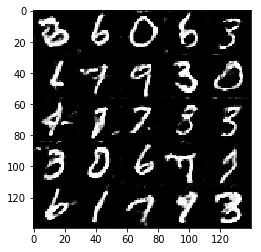

Epoch 2/2... Discriminator Loss: 0.2318... Generator Loss: 1.9741
Epoch 2/2... Discriminator Loss: 1.8373... Generator Loss: 1.0835
Epoch 2/2... Discriminator Loss: 4.5183... Generator Loss: 0.0729
Epoch 2/2... Discriminator Loss: 0.6833... Generator Loss: 1.1294
Epoch 2/2... Discriminator Loss: 1.5379... Generator Loss: 0.6700
Epoch 2/2... Discriminator Loss: 1.7944... Generator Loss: 0.2940
Epoch 2/2... Discriminator Loss: 1.3857... Generator Loss: 0.8119
Epoch 2/2... Discriminator Loss: 0.2145... Generator Loss: 3.1339
Epoch 2/2... Discriminator Loss: 1.4268... Generator Loss: 0.4752
Epoch 2/2... Discriminator Loss: 3.7248... Generator Loss: 0.2386


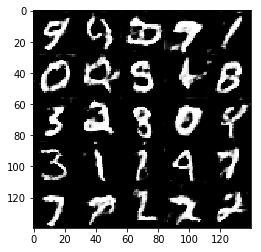

Epoch 2/2... Discriminator Loss: 2.8966... Generator Loss: 0.1194
Epoch 2/2... Discriminator Loss: 0.9531... Generator Loss: 0.9382
Epoch 2/2... Discriminator Loss: 5.2772... Generator Loss: 0.0131
Epoch 2/2... Discriminator Loss: 0.0551... Generator Loss: 5.7077
Epoch 2/2... Discriminator Loss: 2.0490... Generator Loss: 0.4490
Epoch 2/2... Discriminator Loss: 0.3149... Generator Loss: 2.4082
Epoch 2/2... Discriminator Loss: 0.5427... Generator Loss: 4.5044
Epoch 2/2... Discriminator Loss: 0.2726... Generator Loss: 2.1444
Epoch 2/2... Discriminator Loss: 2.0452... Generator Loss: 0.5203
Epoch 2/2... Discriminator Loss: 4.8148... Generator Loss: 0.0465


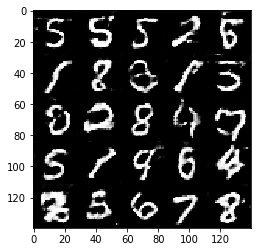

Epoch 2/2... Discriminator Loss: 0.0783... Generator Loss: 6.4328
Epoch 2/2... Discriminator Loss: 0.3066... Generator Loss: 1.9962
Epoch 2/2... Discriminator Loss: 2.5689... Generator Loss: 0.1424
Epoch 2/2... Discriminator Loss: 1.1242... Generator Loss: 0.6268
Epoch 2/2... Discriminator Loss: 4.1820... Generator Loss: 0.0274
Epoch 2/2... Discriminator Loss: 1.4256... Generator Loss: 0.3829
Epoch 2/2... Discriminator Loss: 0.3870... Generator Loss: 7.5759
Epoch 2/2... Discriminator Loss: 0.3159... Generator Loss: 2.2428
Epoch 2/2... Discriminator Loss: 2.0514... Generator Loss: 0.2708
Epoch 2/2... Discriminator Loss: 3.2004... Generator Loss: 0.0729


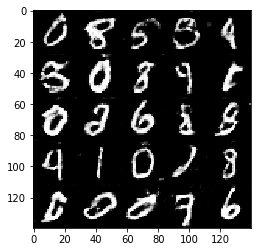

Epoch 2/2... Discriminator Loss: 3.1163... Generator Loss: 0.0925
Epoch 2/2... Discriminator Loss: 3.6912... Generator Loss: 0.1075
Epoch 2/2... Discriminator Loss: 1.3544... Generator Loss: 0.4489
Epoch 2/2... Discriminator Loss: 2.2820... Generator Loss: 0.2688
Epoch 2/2... Discriminator Loss: 0.5994... Generator Loss: 1.2678
Epoch 2/2... Discriminator Loss: 2.8299... Generator Loss: 0.1921
Epoch 2/2... Discriminator Loss: 0.0621... Generator Loss: 4.5272
Epoch 2/2... Discriminator Loss: 1.4807... Generator Loss: 0.6049
Epoch 2/2... Discriminator Loss: 0.2691... Generator Loss: 2.0614
Epoch 2/2... Discriminator Loss: 2.8100... Generator Loss: 0.1341


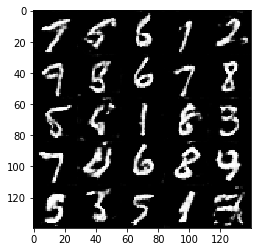

Epoch 2/2... Discriminator Loss: 3.8368... Generator Loss: 0.1538
Epoch 2/2... Discriminator Loss: 0.0167... Generator Loss: 5.9258
Epoch 2/2... Discriminator Loss: 0.5008... Generator Loss: 1.7188
Epoch 2/2... Discriminator Loss: 2.4355... Generator Loss: 0.3878
Epoch 2/2... Discriminator Loss: 2.2563... Generator Loss: 0.1654
Epoch 2/2... Discriminator Loss: 0.6430... Generator Loss: 1.2594
Epoch 2/2... Discriminator Loss: 0.3469... Generator Loss: 1.8126
Epoch 2/2... Discriminator Loss: 1.1508... Generator Loss: 0.5648
Epoch 2/2... Discriminator Loss: 1.3936... Generator Loss: 0.5196
Epoch 2/2... Discriminator Loss: 3.1700... Generator Loss: 0.1002


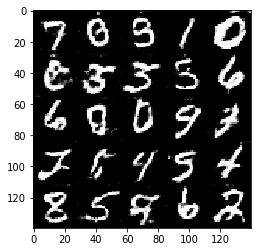

Epoch 2/2... Discriminator Loss: 0.0569... Generator Loss: 3.7770
Epoch 2/2... Discriminator Loss: 1.8002... Generator Loss: 0.3386
Epoch 2/2... Discriminator Loss: 0.8786... Generator Loss: 0.9968
Epoch 2/2... Discriminator Loss: 5.1117... Generator Loss: 0.0108
Epoch 2/2... Discriminator Loss: 0.5616... Generator Loss: 1.8303
Epoch 2/2... Discriminator Loss: 0.4928... Generator Loss: 3.5277
Epoch 2/2... Discriminator Loss: 3.3416... Generator Loss: 0.0634
Epoch 2/2... Discriminator Loss: 0.5474... Generator Loss: 1.5018
Epoch 2/2... Discriminator Loss: 4.6080... Generator Loss: 0.0174
Epoch 2/2... Discriminator Loss: 0.5089... Generator Loss: 6.0352


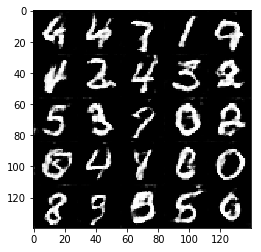

Epoch 2/2... Discriminator Loss: 0.5488... Generator Loss: 1.3351
Epoch 2/2... Discriminator Loss: 0.6864... Generator Loss: 1.3573
Epoch 2/2... Discriminator Loss: 3.9543... Generator Loss: 0.0655
Epoch 2/2... Discriminator Loss: 3.9571... Generator Loss: 0.0589
Epoch 2/2... Discriminator Loss: 0.9506... Generator Loss: 0.7072


In [36]:
batch_size = 32
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))

print(mnist_dataset)

with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.4715... Generator Loss: 2.6448
Epoch 1/1... Discriminator Loss: 1.4137... Generator Loss: 0.4277
Epoch 1/1... Discriminator Loss: 2.4254... Generator Loss: 4.7682
Epoch 1/1... Discriminator Loss: 3.6853... Generator Loss: 4.1643
Epoch 1/1... Discriminator Loss: 0.6305... Generator Loss: 1.7127
Epoch 1/1... Discriminator Loss: 1.0707... Generator Loss: 0.6601
Epoch 1/1... Discriminator Loss: 1.3159... Generator Loss: 0.5059
Epoch 1/1... Discriminator Loss: 1.3319... Generator Loss: 0.5122
Epoch 1/1... Discriminator Loss: 1.1253... Generator Loss: 1.1611
Epoch 1/1... Discriminator Loss: 1.1854... Generator Loss: 0.7629


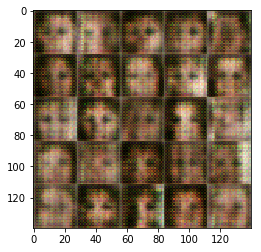

Epoch 1/1... Discriminator Loss: 1.3370... Generator Loss: 0.7097
Epoch 1/1... Discriminator Loss: 1.3498... Generator Loss: 0.4358
Epoch 1/1... Discriminator Loss: 1.4358... Generator Loss: 1.0131
Epoch 1/1... Discriminator Loss: 1.0370... Generator Loss: 0.6980
Epoch 1/1... Discriminator Loss: 1.6819... Generator Loss: 0.6835
Epoch 1/1... Discriminator Loss: 1.4333... Generator Loss: 1.0914
Epoch 1/1... Discriminator Loss: 0.8533... Generator Loss: 0.8203
Epoch 1/1... Discriminator Loss: 1.3221... Generator Loss: 1.0936
Epoch 1/1... Discriminator Loss: 3.6828... Generator Loss: 0.0361
Epoch 1/1... Discriminator Loss: 1.3772... Generator Loss: 0.6618


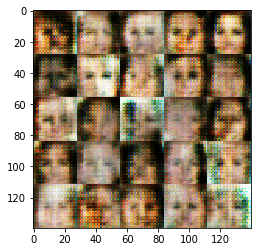

Epoch 1/1... Discriminator Loss: 1.3080... Generator Loss: 0.7085
Epoch 1/1... Discriminator Loss: 1.3292... Generator Loss: 0.6942
Epoch 1/1... Discriminator Loss: 1.3210... Generator Loss: 0.5467
Epoch 1/1... Discriminator Loss: 1.3529... Generator Loss: 0.5892
Epoch 1/1... Discriminator Loss: 1.1288... Generator Loss: 0.7388
Epoch 1/1... Discriminator Loss: 1.1685... Generator Loss: 0.9065
Epoch 1/1... Discriminator Loss: 1.1690... Generator Loss: 0.8401
Epoch 1/1... Discriminator Loss: 1.2871... Generator Loss: 0.8792
Epoch 1/1... Discriminator Loss: 1.3677... Generator Loss: 0.4738
Epoch 1/1... Discriminator Loss: 1.0179... Generator Loss: 0.8275


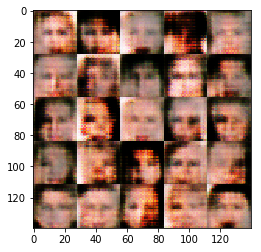

Epoch 1/1... Discriminator Loss: 1.2622... Generator Loss: 0.4672
Epoch 1/1... Discriminator Loss: 1.2999... Generator Loss: 1.0916
Epoch 1/1... Discriminator Loss: 1.1595... Generator Loss: 0.6923
Epoch 1/1... Discriminator Loss: 0.8631... Generator Loss: 0.9602
Epoch 1/1... Discriminator Loss: 1.4157... Generator Loss: 1.2004
Epoch 1/1... Discriminator Loss: 1.4624... Generator Loss: 0.6187
Epoch 1/1... Discriminator Loss: 1.4752... Generator Loss: 0.5774
Epoch 1/1... Discriminator Loss: 1.5951... Generator Loss: 1.0535
Epoch 1/1... Discriminator Loss: 1.6271... Generator Loss: 0.6251
Epoch 1/1... Discriminator Loss: 1.3937... Generator Loss: 0.5354


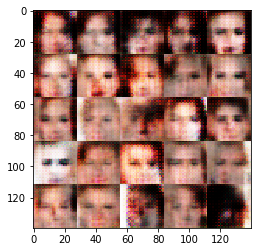

Epoch 1/1... Discriminator Loss: 1.7553... Generator Loss: 0.2811
Epoch 1/1... Discriminator Loss: 1.4136... Generator Loss: 0.4257
Epoch 1/1... Discriminator Loss: 1.2206... Generator Loss: 0.5257
Epoch 1/1... Discriminator Loss: 0.9491... Generator Loss: 0.8347
Epoch 1/1... Discriminator Loss: 1.2932... Generator Loss: 0.7913
Epoch 1/1... Discriminator Loss: 1.0008... Generator Loss: 0.8851
Epoch 1/1... Discriminator Loss: 1.2082... Generator Loss: 0.6243
Epoch 1/1... Discriminator Loss: 1.4819... Generator Loss: 1.3872
Epoch 1/1... Discriminator Loss: 1.5499... Generator Loss: 0.6303
Epoch 1/1... Discriminator Loss: 1.7941... Generator Loss: 1.6464


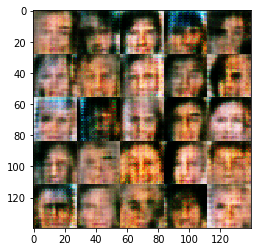

Epoch 1/1... Discriminator Loss: 1.6052... Generator Loss: 0.4228
Epoch 1/1... Discriminator Loss: 1.7382... Generator Loss: 0.2881
Epoch 1/1... Discriminator Loss: 1.8938... Generator Loss: 0.4421
Epoch 1/1... Discriminator Loss: 1.0740... Generator Loss: 0.9217
Epoch 1/1... Discriminator Loss: 1.1762... Generator Loss: 0.9362
Epoch 1/1... Discriminator Loss: 1.5617... Generator Loss: 0.4530
Epoch 1/1... Discriminator Loss: 1.1841... Generator Loss: 0.6547
Epoch 1/1... Discriminator Loss: 0.9240... Generator Loss: 1.1263
Epoch 1/1... Discriminator Loss: 1.3167... Generator Loss: 0.7882
Epoch 1/1... Discriminator Loss: 1.2312... Generator Loss: 0.7378


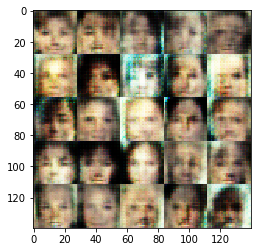

Epoch 1/1... Discriminator Loss: 1.5787... Generator Loss: 0.5834
Epoch 1/1... Discriminator Loss: 1.5523... Generator Loss: 1.0762
Epoch 1/1... Discriminator Loss: 1.0914... Generator Loss: 0.8042
Epoch 1/1... Discriminator Loss: 1.1200... Generator Loss: 0.7168
Epoch 1/1... Discriminator Loss: 1.5767... Generator Loss: 0.3958
Epoch 1/1... Discriminator Loss: 1.1462... Generator Loss: 0.8237
Epoch 1/1... Discriminator Loss: 1.3051... Generator Loss: 0.3757
Epoch 1/1... Discriminator Loss: 1.6315... Generator Loss: 0.8394
Epoch 1/1... Discriminator Loss: 1.6275... Generator Loss: 0.3656
Epoch 1/1... Discriminator Loss: 1.7647... Generator Loss: 0.6213


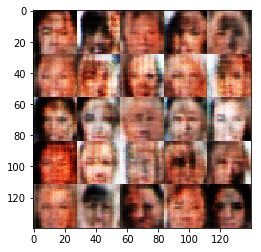

Epoch 1/1... Discriminator Loss: 1.7017... Generator Loss: 0.2740
Epoch 1/1... Discriminator Loss: 1.4051... Generator Loss: 1.1197
Epoch 1/1... Discriminator Loss: 1.8139... Generator Loss: 1.4766
Epoch 1/1... Discriminator Loss: 1.3332... Generator Loss: 0.7816
Epoch 1/1... Discriminator Loss: 1.1729... Generator Loss: 0.8821
Epoch 1/1... Discriminator Loss: 1.8192... Generator Loss: 0.2099
Epoch 1/1... Discriminator Loss: 1.2525... Generator Loss: 1.2927
Epoch 1/1... Discriminator Loss: 1.0970... Generator Loss: 0.7892
Epoch 1/1... Discriminator Loss: 1.3499... Generator Loss: 1.1532
Epoch 1/1... Discriminator Loss: 1.3503... Generator Loss: 0.6866


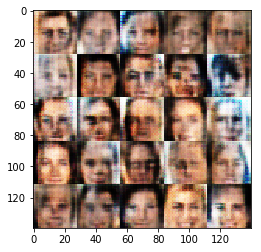

Epoch 1/1... Discriminator Loss: 1.5394... Generator Loss: 0.3413
Epoch 1/1... Discriminator Loss: 1.3937... Generator Loss: 0.4063
Epoch 1/1... Discriminator Loss: 1.6896... Generator Loss: 1.0077
Epoch 1/1... Discriminator Loss: 1.5311... Generator Loss: 0.5315
Epoch 1/1... Discriminator Loss: 1.4861... Generator Loss: 0.8621
Epoch 1/1... Discriminator Loss: 1.6654... Generator Loss: 0.8170
Epoch 1/1... Discriminator Loss: 1.1409... Generator Loss: 0.7010
Epoch 1/1... Discriminator Loss: 1.5837... Generator Loss: 0.5142
Epoch 1/1... Discriminator Loss: 1.5261... Generator Loss: 0.4242
Epoch 1/1... Discriminator Loss: 1.2264... Generator Loss: 0.7493


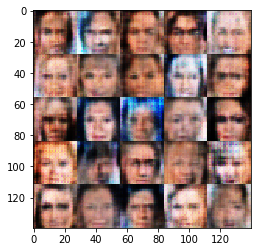

Epoch 1/1... Discriminator Loss: 1.2349... Generator Loss: 0.4674
Epoch 1/1... Discriminator Loss: 1.2253... Generator Loss: 0.6762
Epoch 1/1... Discriminator Loss: 1.6540... Generator Loss: 1.3947
Epoch 1/1... Discriminator Loss: 1.1803... Generator Loss: 0.6035
Epoch 1/1... Discriminator Loss: 1.2653... Generator Loss: 0.7551
Epoch 1/1... Discriminator Loss: 1.3017... Generator Loss: 0.6133
Epoch 1/1... Discriminator Loss: 1.3200... Generator Loss: 0.6056
Epoch 1/1... Discriminator Loss: 1.2772... Generator Loss: 0.4599
Epoch 1/1... Discriminator Loss: 1.4218... Generator Loss: 0.3880
Epoch 1/1... Discriminator Loss: 1.2484... Generator Loss: 0.9502


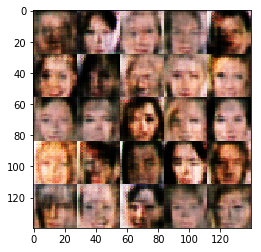

Epoch 1/1... Discriminator Loss: 1.3488... Generator Loss: 0.6436
Epoch 1/1... Discriminator Loss: 1.8021... Generator Loss: 0.2721
Epoch 1/1... Discriminator Loss: 0.9870... Generator Loss: 0.8423
Epoch 1/1... Discriminator Loss: 1.0875... Generator Loss: 0.8280
Epoch 1/1... Discriminator Loss: 1.4590... Generator Loss: 0.4985
Epoch 1/1... Discriminator Loss: 1.5067... Generator Loss: 0.8440
Epoch 1/1... Discriminator Loss: 2.1336... Generator Loss: 0.2119
Epoch 1/1... Discriminator Loss: 1.4408... Generator Loss: 0.6257
Epoch 1/1... Discriminator Loss: 1.4505... Generator Loss: 0.5099
Epoch 1/1... Discriminator Loss: 1.1511... Generator Loss: 0.7940


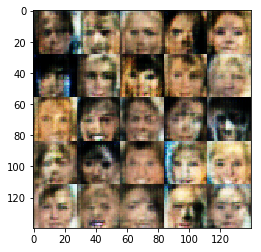

Epoch 1/1... Discriminator Loss: 1.4895... Generator Loss: 0.6333
Epoch 1/1... Discriminator Loss: 1.2467... Generator Loss: 0.5858
Epoch 1/1... Discriminator Loss: 1.4270... Generator Loss: 0.7649
Epoch 1/1... Discriminator Loss: 1.1472... Generator Loss: 0.4646
Epoch 1/1... Discriminator Loss: 1.3033... Generator Loss: 0.7018
Epoch 1/1... Discriminator Loss: 1.7042... Generator Loss: 0.4441
Epoch 1/1... Discriminator Loss: 1.1799... Generator Loss: 0.5766
Epoch 1/1... Discriminator Loss: 2.2188... Generator Loss: 1.2282
Epoch 1/1... Discriminator Loss: 1.5435... Generator Loss: 0.4712
Epoch 1/1... Discriminator Loss: 1.4506... Generator Loss: 0.5151


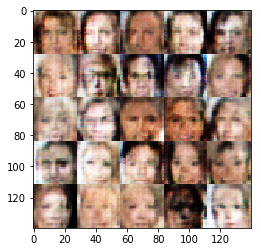

Epoch 1/1... Discriminator Loss: 1.6710... Generator Loss: 0.4018
Epoch 1/1... Discriminator Loss: 1.5317... Generator Loss: 0.4442
Epoch 1/1... Discriminator Loss: 1.2593... Generator Loss: 0.6231
Epoch 1/1... Discriminator Loss: 1.6076... Generator Loss: 0.2873
Epoch 1/1... Discriminator Loss: 3.1149... Generator Loss: 0.0534
Epoch 1/1... Discriminator Loss: 1.1432... Generator Loss: 0.6462
Epoch 1/1... Discriminator Loss: 1.5072... Generator Loss: 1.2224
Epoch 1/1... Discriminator Loss: 1.0461... Generator Loss: 1.0340
Epoch 1/1... Discriminator Loss: 1.2460... Generator Loss: 0.4993
Epoch 1/1... Discriminator Loss: 1.4071... Generator Loss: 0.5002


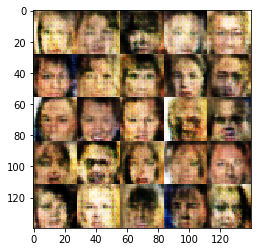

Epoch 1/1... Discriminator Loss: 1.5212... Generator Loss: 0.3379
Epoch 1/1... Discriminator Loss: 1.6722... Generator Loss: 0.5422
Epoch 1/1... Discriminator Loss: 1.1062... Generator Loss: 0.7991
Epoch 1/1... Discriminator Loss: 1.4613... Generator Loss: 0.4924
Epoch 1/1... Discriminator Loss: 1.2972... Generator Loss: 1.4239
Epoch 1/1... Discriminator Loss: 1.4575... Generator Loss: 0.5602
Epoch 1/1... Discriminator Loss: 1.2718... Generator Loss: 0.8624
Epoch 1/1... Discriminator Loss: 1.5884... Generator Loss: 0.3770
Epoch 1/1... Discriminator Loss: 1.1644... Generator Loss: 1.0286
Epoch 1/1... Discriminator Loss: 0.9494... Generator Loss: 0.6217


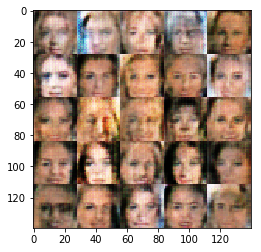

Epoch 1/1... Discriminator Loss: 0.9566... Generator Loss: 0.6413
Epoch 1/1... Discriminator Loss: 1.4035... Generator Loss: 0.7673
Epoch 1/1... Discriminator Loss: 1.2855... Generator Loss: 0.5654
Epoch 1/1... Discriminator Loss: 1.4142... Generator Loss: 0.5148
Epoch 1/1... Discriminator Loss: 1.2758... Generator Loss: 0.8064
Epoch 1/1... Discriminator Loss: 1.2370... Generator Loss: 0.7599
Epoch 1/1... Discriminator Loss: 1.4332... Generator Loss: 0.5597
Epoch 1/1... Discriminator Loss: 1.7624... Generator Loss: 0.4930
Epoch 1/1... Discriminator Loss: 2.3636... Generator Loss: 2.7140
Epoch 1/1... Discriminator Loss: 1.6206... Generator Loss: 0.4305


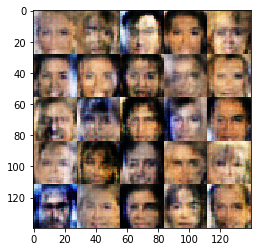

Epoch 1/1... Discriminator Loss: 1.0384... Generator Loss: 0.5900
Epoch 1/1... Discriminator Loss: 1.4001... Generator Loss: 0.5653
Epoch 1/1... Discriminator Loss: 1.1485... Generator Loss: 0.8351
Epoch 1/1... Discriminator Loss: 1.2085... Generator Loss: 0.6551
Epoch 1/1... Discriminator Loss: 1.0373... Generator Loss: 0.6678
Epoch 1/1... Discriminator Loss: 1.2290... Generator Loss: 0.5433
Epoch 1/1... Discriminator Loss: 1.2091... Generator Loss: 1.0698
Epoch 1/1... Discriminator Loss: 1.3451... Generator Loss: 0.5332
Epoch 1/1... Discriminator Loss: 1.9846... Generator Loss: 0.2091
Epoch 1/1... Discriminator Loss: 1.3529... Generator Loss: 0.5846


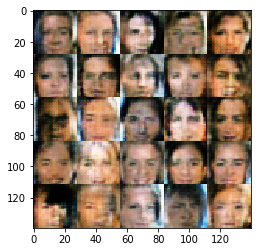

Epoch 1/1... Discriminator Loss: 1.3927... Generator Loss: 0.5577
Epoch 1/1... Discriminator Loss: 1.0906... Generator Loss: 0.5377
Epoch 1/1... Discriminator Loss: 2.1487... Generator Loss: 2.0559
Epoch 1/1... Discriminator Loss: 1.2356... Generator Loss: 0.6745
Epoch 1/1... Discriminator Loss: 0.9498... Generator Loss: 0.9453
Epoch 1/1... Discriminator Loss: 1.1956... Generator Loss: 1.4669
Epoch 1/1... Discriminator Loss: 1.5087... Generator Loss: 0.4751
Epoch 1/1... Discriminator Loss: 1.3695... Generator Loss: 0.4293
Epoch 1/1... Discriminator Loss: 0.9362... Generator Loss: 0.7464
Epoch 1/1... Discriminator Loss: 1.0518... Generator Loss: 0.7166


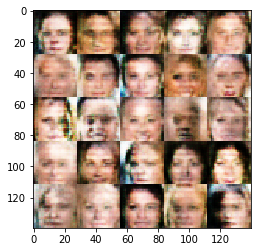

Epoch 1/1... Discriminator Loss: 1.1292... Generator Loss: 0.6451
Epoch 1/1... Discriminator Loss: 1.1865... Generator Loss: 0.4974
Epoch 1/1... Discriminator Loss: 1.3479... Generator Loss: 1.0325
Epoch 1/1... Discriminator Loss: 1.1212... Generator Loss: 1.4846
Epoch 1/1... Discriminator Loss: 1.2750... Generator Loss: 0.8795
Epoch 1/1... Discriminator Loss: 1.2504... Generator Loss: 0.5483
Epoch 1/1... Discriminator Loss: 0.9372... Generator Loss: 0.7210
Epoch 1/1... Discriminator Loss: 0.7986... Generator Loss: 1.0914
Epoch 1/1... Discriminator Loss: 1.5054... Generator Loss: 0.3337
Epoch 1/1... Discriminator Loss: 1.7722... Generator Loss: 2.0740


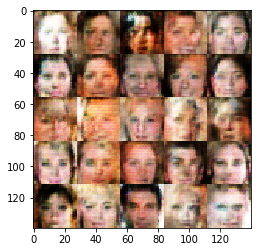

Epoch 1/1... Discriminator Loss: 0.7106... Generator Loss: 0.8541
Epoch 1/1... Discriminator Loss: 1.0029... Generator Loss: 1.0673
Epoch 1/1... Discriminator Loss: 1.6242... Generator Loss: 0.9755
Epoch 1/1... Discriminator Loss: 1.0156... Generator Loss: 1.0484
Epoch 1/1... Discriminator Loss: 1.8155... Generator Loss: 0.2891
Epoch 1/1... Discriminator Loss: 0.9515... Generator Loss: 0.7949
Epoch 1/1... Discriminator Loss: 0.9573... Generator Loss: 0.6954
Epoch 1/1... Discriminator Loss: 1.4077... Generator Loss: 0.5114
Epoch 1/1... Discriminator Loss: 1.1821... Generator Loss: 1.2686
Epoch 1/1... Discriminator Loss: 1.4204... Generator Loss: 0.4442


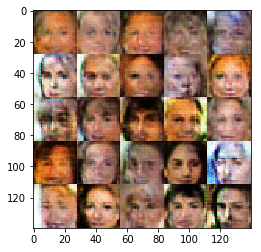

Epoch 1/1... Discriminator Loss: 1.3157... Generator Loss: 0.4155
Epoch 1/1... Discriminator Loss: 1.7393... Generator Loss: 0.2471
Epoch 1/1... Discriminator Loss: 1.5517... Generator Loss: 0.2932
Epoch 1/1... Discriminator Loss: 1.9392... Generator Loss: 1.2520
Epoch 1/1... Discriminator Loss: 0.8954... Generator Loss: 1.1543
Epoch 1/1... Discriminator Loss: 1.6310... Generator Loss: 0.9394
Epoch 1/1... Discriminator Loss: 1.0792... Generator Loss: 0.6655
Epoch 1/1... Discriminator Loss: 1.7637... Generator Loss: 0.8511
Epoch 1/1... Discriminator Loss: 1.1855... Generator Loss: 0.4585
Epoch 1/1... Discriminator Loss: 1.0116... Generator Loss: 1.9474


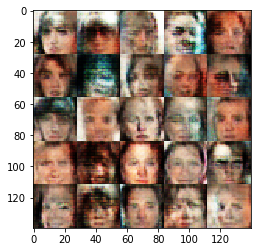

Epoch 1/1... Discriminator Loss: 1.0190... Generator Loss: 1.2493
Epoch 1/1... Discriminator Loss: 0.8651... Generator Loss: 1.0444
Epoch 1/1... Discriminator Loss: 2.0675... Generator Loss: 0.1883
Epoch 1/1... Discriminator Loss: 0.9390... Generator Loss: 1.2747
Epoch 1/1... Discriminator Loss: 1.1055... Generator Loss: 1.1462
Epoch 1/1... Discriminator Loss: 1.0942... Generator Loss: 1.1486
Epoch 1/1... Discriminator Loss: 1.5317... Generator Loss: 0.3485
Epoch 1/1... Discriminator Loss: 0.9464... Generator Loss: 1.3057
Epoch 1/1... Discriminator Loss: 0.9652... Generator Loss: 1.6942
Epoch 1/1... Discriminator Loss: 2.0564... Generator Loss: 0.2509


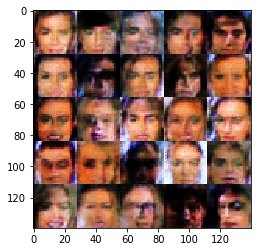

Epoch 1/1... Discriminator Loss: 1.1404... Generator Loss: 0.5399
Epoch 1/1... Discriminator Loss: 1.1298... Generator Loss: 0.5402
Epoch 1/1... Discriminator Loss: 2.3347... Generator Loss: 2.2083
Epoch 1/1... Discriminator Loss: 1.6195... Generator Loss: 0.4747
Epoch 1/1... Discriminator Loss: 1.8685... Generator Loss: 0.2084
Epoch 1/1... Discriminator Loss: 1.2473... Generator Loss: 0.5093
Epoch 1/1... Discriminator Loss: 0.9352... Generator Loss: 1.0174
Epoch 1/1... Discriminator Loss: 0.5351... Generator Loss: 1.1264
Epoch 1/1... Discriminator Loss: 1.7362... Generator Loss: 0.2952
Epoch 1/1... Discriminator Loss: 0.7874... Generator Loss: 1.0491


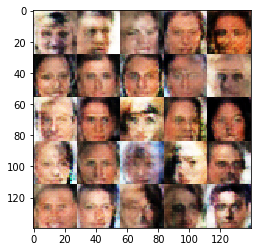

Epoch 1/1... Discriminator Loss: 1.8636... Generator Loss: 0.3213
Epoch 1/1... Discriminator Loss: 0.8380... Generator Loss: 1.4810
Epoch 1/1... Discriminator Loss: 1.2276... Generator Loss: 1.0670
Epoch 1/1... Discriminator Loss: 0.7168... Generator Loss: 0.9406
Epoch 1/1... Discriminator Loss: 1.1778... Generator Loss: 1.0508
Epoch 1/1... Discriminator Loss: 1.3090... Generator Loss: 0.5078
Epoch 1/1... Discriminator Loss: 1.2132... Generator Loss: 0.9916
Epoch 1/1... Discriminator Loss: 1.4415... Generator Loss: 0.3326
Epoch 1/1... Discriminator Loss: 2.5690... Generator Loss: 0.1220
Epoch 1/1... Discriminator Loss: 1.2937... Generator Loss: 0.6001


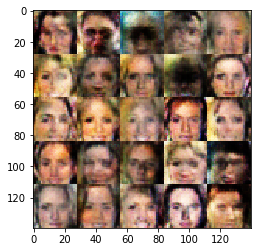

Epoch 1/1... Discriminator Loss: 0.9879... Generator Loss: 0.7552
Epoch 1/1... Discriminator Loss: 1.3820... Generator Loss: 0.3959
Epoch 1/1... Discriminator Loss: 0.7603... Generator Loss: 0.8717
Epoch 1/1... Discriminator Loss: 1.0371... Generator Loss: 0.5846
Epoch 1/1... Discriminator Loss: 2.0281... Generator Loss: 2.7792
Epoch 1/1... Discriminator Loss: 1.0615... Generator Loss: 0.5148
Epoch 1/1... Discriminator Loss: 1.3881... Generator Loss: 0.3950
Epoch 1/1... Discriminator Loss: 0.4446... Generator Loss: 1.8536
Epoch 1/1... Discriminator Loss: 1.5839... Generator Loss: 0.3284
Epoch 1/1... Discriminator Loss: 1.0764... Generator Loss: 0.6552


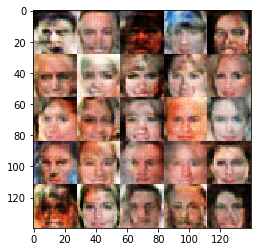

Epoch 1/1... Discriminator Loss: 0.6888... Generator Loss: 0.8396
Epoch 1/1... Discriminator Loss: 1.1852... Generator Loss: 0.4726
Epoch 1/1... Discriminator Loss: 0.8937... Generator Loss: 1.1551
Epoch 1/1... Discriminator Loss: 1.3622... Generator Loss: 0.5501
Epoch 1/1... Discriminator Loss: 0.9965... Generator Loss: 1.8945
Epoch 1/1... Discriminator Loss: 1.3244... Generator Loss: 0.4001
Epoch 1/1... Discriminator Loss: 0.5149... Generator Loss: 1.1874
Epoch 1/1... Discriminator Loss: 1.6283... Generator Loss: 3.1469
Epoch 1/1... Discriminator Loss: 1.3096... Generator Loss: 0.4530
Epoch 1/1... Discriminator Loss: 3.0544... Generator Loss: 0.0639


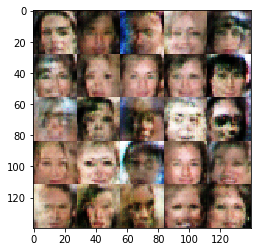

Epoch 1/1... Discriminator Loss: 0.8941... Generator Loss: 0.8107
Epoch 1/1... Discriminator Loss: 1.1925... Generator Loss: 0.5800
Epoch 1/1... Discriminator Loss: 1.2818... Generator Loss: 0.4444
Epoch 1/1... Discriminator Loss: 0.9776... Generator Loss: 0.6643
Epoch 1/1... Discriminator Loss: 1.9196... Generator Loss: 0.1943
Epoch 1/1... Discriminator Loss: 1.2661... Generator Loss: 0.4403
Epoch 1/1... Discriminator Loss: 1.3406... Generator Loss: 0.4431
Epoch 1/1... Discriminator Loss: 1.1959... Generator Loss: 0.8113
Epoch 1/1... Discriminator Loss: 0.6978... Generator Loss: 0.9132
Epoch 1/1... Discriminator Loss: 1.6255... Generator Loss: 0.2762


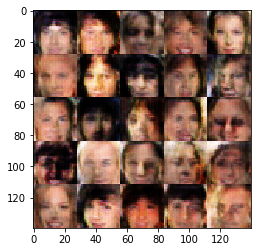

Epoch 1/1... Discriminator Loss: 0.8846... Generator Loss: 0.8122
Epoch 1/1... Discriminator Loss: 0.7127... Generator Loss: 1.3593
Epoch 1/1... Discriminator Loss: 0.5474... Generator Loss: 1.3043
Epoch 1/1... Discriminator Loss: 0.8462... Generator Loss: 1.1950
Epoch 1/1... Discriminator Loss: 0.9200... Generator Loss: 0.7090
Epoch 1/1... Discriminator Loss: 0.6791... Generator Loss: 1.2017
Epoch 1/1... Discriminator Loss: 0.7493... Generator Loss: 1.4366
Epoch 1/1... Discriminator Loss: 2.2123... Generator Loss: 0.1708
Epoch 1/1... Discriminator Loss: 1.6658... Generator Loss: 0.2859
Epoch 1/1... Discriminator Loss: 0.9611... Generator Loss: 0.7219


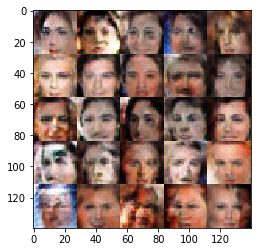

Epoch 1/1... Discriminator Loss: 1.2959... Generator Loss: 0.4310
Epoch 1/1... Discriminator Loss: 1.3277... Generator Loss: 0.4165
Epoch 1/1... Discriminator Loss: 0.7095... Generator Loss: 0.9367
Epoch 1/1... Discriminator Loss: 0.9513... Generator Loss: 0.9383
Epoch 1/1... Discriminator Loss: 0.8956... Generator Loss: 1.7053
Epoch 1/1... Discriminator Loss: 1.9774... Generator Loss: 0.2032
Epoch 1/1... Discriminator Loss: 1.1533... Generator Loss: 1.7254
Epoch 1/1... Discriminator Loss: 2.3621... Generator Loss: 0.1236
Epoch 1/1... Discriminator Loss: 1.1764... Generator Loss: 0.5275
Epoch 1/1... Discriminator Loss: 1.5144... Generator Loss: 0.3208


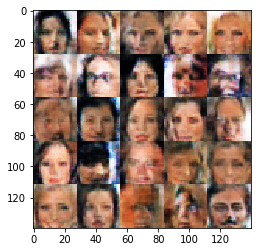

Epoch 1/1... Discriminator Loss: 1.0811... Generator Loss: 1.3829
Epoch 1/1... Discriminator Loss: 0.8792... Generator Loss: 0.7014
Epoch 1/1... Discriminator Loss: 1.1316... Generator Loss: 0.5080
Epoch 1/1... Discriminator Loss: 2.6919... Generator Loss: 0.1060
Epoch 1/1... Discriminator Loss: 2.6804... Generator Loss: 0.0991
Epoch 1/1... Discriminator Loss: 1.3666... Generator Loss: 0.4348
Epoch 1/1... Discriminator Loss: 1.9155... Generator Loss: 0.2529
Epoch 1/1... Discriminator Loss: 0.7835... Generator Loss: 0.8782
Epoch 1/1... Discriminator Loss: 0.5073... Generator Loss: 1.1895
Epoch 1/1... Discriminator Loss: 0.9806... Generator Loss: 0.7702


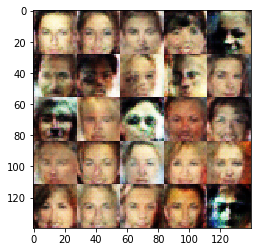

Epoch 1/1... Discriminator Loss: 0.7111... Generator Loss: 1.1335
Epoch 1/1... Discriminator Loss: 2.2540... Generator Loss: 0.1446
Epoch 1/1... Discriminator Loss: 2.5004... Generator Loss: 0.1255
Epoch 1/1... Discriminator Loss: 1.0335... Generator Loss: 0.5727
Epoch 1/1... Discriminator Loss: 1.5878... Generator Loss: 0.3039
Epoch 1/1... Discriminator Loss: 1.0602... Generator Loss: 1.0375
Epoch 1/1... Discriminator Loss: 1.5060... Generator Loss: 0.3193
Epoch 1/1... Discriminator Loss: 0.4847... Generator Loss: 1.4664
Epoch 1/1... Discriminator Loss: 0.7901... Generator Loss: 1.9124
Epoch 1/1... Discriminator Loss: 0.6511... Generator Loss: 1.6539


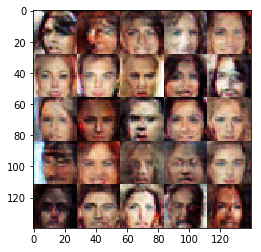

Epoch 1/1... Discriminator Loss: 1.1803... Generator Loss: 0.5466
Epoch 1/1... Discriminator Loss: 1.3224... Generator Loss: 0.6018
Epoch 1/1... Discriminator Loss: 1.2487... Generator Loss: 0.4901
Epoch 1/1... Discriminator Loss: 2.8052... Generator Loss: 0.0930
Epoch 1/1... Discriminator Loss: 1.8846... Generator Loss: 0.2030
Epoch 1/1... Discriminator Loss: 1.3438... Generator Loss: 0.3908
Epoch 1/1... Discriminator Loss: 2.0713... Generator Loss: 0.1742
Epoch 1/1... Discriminator Loss: 1.7148... Generator Loss: 0.2502
Epoch 1/1... Discriminator Loss: 1.7986... Generator Loss: 0.2447
Epoch 1/1... Discriminator Loss: 0.9330... Generator Loss: 0.6639


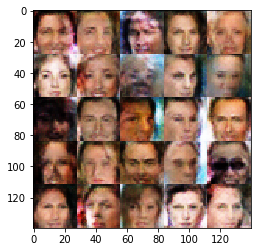

Epoch 1/1... Discriminator Loss: 1.7813... Generator Loss: 0.2468
Epoch 1/1... Discriminator Loss: 1.7861... Generator Loss: 0.2394
Epoch 1/1... Discriminator Loss: 0.6670... Generator Loss: 1.5236
Epoch 1/1... Discriminator Loss: 1.2976... Generator Loss: 0.3692
Epoch 1/1... Discriminator Loss: 0.9405... Generator Loss: 0.7551
Epoch 1/1... Discriminator Loss: 2.8269... Generator Loss: 0.0935
Epoch 1/1... Discriminator Loss: 1.4092... Generator Loss: 0.3766
Epoch 1/1... Discriminator Loss: 1.7237... Generator Loss: 0.2709
Epoch 1/1... Discriminator Loss: 2.4960... Generator Loss: 0.1086
Epoch 1/1... Discriminator Loss: 1.1973... Generator Loss: 0.4250


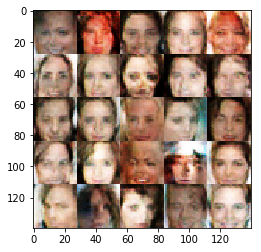

Epoch 1/1... Discriminator Loss: 0.6496... Generator Loss: 1.0943
Epoch 1/1... Discriminator Loss: 1.7301... Generator Loss: 2.7766
Epoch 1/1... Discriminator Loss: 0.7612... Generator Loss: 0.8419
Epoch 1/1... Discriminator Loss: 0.7612... Generator Loss: 0.8380
Epoch 1/1... Discriminator Loss: 0.7141... Generator Loss: 1.8482
Epoch 1/1... Discriminator Loss: 1.7629... Generator Loss: 0.2666
Epoch 1/1... Discriminator Loss: 1.2204... Generator Loss: 0.8685
Epoch 1/1... Discriminator Loss: 2.4656... Generator Loss: 0.1258
Epoch 1/1... Discriminator Loss: 1.2053... Generator Loss: 0.5224
Epoch 1/1... Discriminator Loss: 2.0694... Generator Loss: 0.1847


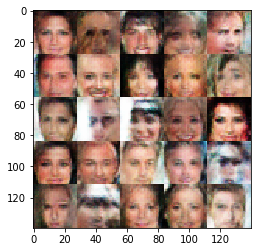

Epoch 1/1... Discriminator Loss: 2.1313... Generator Loss: 0.1881
Epoch 1/1... Discriminator Loss: 0.6709... Generator Loss: 1.1310
Epoch 1/1... Discriminator Loss: 1.3346... Generator Loss: 0.4429
Epoch 1/1... Discriminator Loss: 1.1068... Generator Loss: 0.4949
Epoch 1/1... Discriminator Loss: 1.9859... Generator Loss: 0.2065
Epoch 1/1... Discriminator Loss: 2.9208... Generator Loss: 0.0768
Epoch 1/1... Discriminator Loss: 3.4479... Generator Loss: 0.0464
Epoch 1/1... Discriminator Loss: 0.7479... Generator Loss: 1.2652
Epoch 1/1... Discriminator Loss: 0.8015... Generator Loss: 0.8339
Epoch 1/1... Discriminator Loss: 1.2552... Generator Loss: 0.4270


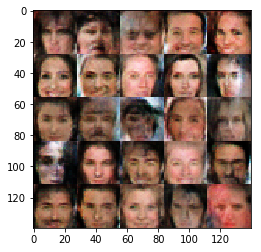

Epoch 1/1... Discriminator Loss: 2.1400... Generator Loss: 0.1620
Epoch 1/1... Discriminator Loss: 2.6849... Generator Loss: 0.1008
Epoch 1/1... Discriminator Loss: 0.8460... Generator Loss: 0.8577
Epoch 1/1... Discriminator Loss: 1.3275... Generator Loss: 1.4553
Epoch 1/1... Discriminator Loss: 1.5145... Generator Loss: 0.2927
Epoch 1/1... Discriminator Loss: 0.6793... Generator Loss: 1.0844
Epoch 1/1... Discriminator Loss: 0.7175... Generator Loss: 0.9079
Epoch 1/1... Discriminator Loss: 2.4728... Generator Loss: 0.1388
Epoch 1/1... Discriminator Loss: 1.1344... Generator Loss: 3.8714
Epoch 1/1... Discriminator Loss: 2.6258... Generator Loss: 0.1063


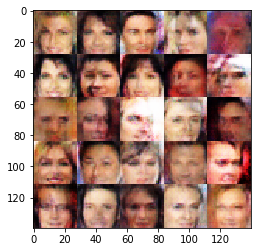

Epoch 1/1... Discriminator Loss: 0.8960... Generator Loss: 4.6881
Epoch 1/1... Discriminator Loss: 0.9979... Generator Loss: 0.9794
Epoch 1/1... Discriminator Loss: 1.8354... Generator Loss: 0.2057
Epoch 1/1... Discriminator Loss: 2.1646... Generator Loss: 0.1587
Epoch 1/1... Discriminator Loss: 1.7864... Generator Loss: 4.1872
Epoch 1/1... Discriminator Loss: 1.2449... Generator Loss: 0.4355
Epoch 1/1... Discriminator Loss: 1.0222... Generator Loss: 0.5748
Epoch 1/1... Discriminator Loss: 0.6410... Generator Loss: 1.7417
Epoch 1/1... Discriminator Loss: 1.1241... Generator Loss: 0.5265
Epoch 1/1... Discriminator Loss: 0.5622... Generator Loss: 1.3345


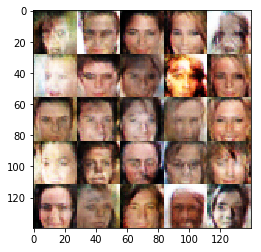

Epoch 1/1... Discriminator Loss: 1.1518... Generator Loss: 0.5054
Epoch 1/1... Discriminator Loss: 2.1461... Generator Loss: 0.1799
Epoch 1/1... Discriminator Loss: 1.0220... Generator Loss: 0.8707
Epoch 1/1... Discriminator Loss: 1.3969... Generator Loss: 2.4944
Epoch 1/1... Discriminator Loss: 1.1081... Generator Loss: 0.4917
Epoch 1/1... Discriminator Loss: 1.1807... Generator Loss: 0.5560
Epoch 1/1... Discriminator Loss: 0.5390... Generator Loss: 1.1635
Epoch 1/1... Discriminator Loss: 1.1104... Generator Loss: 0.5386
Epoch 1/1... Discriminator Loss: 2.9446... Generator Loss: 0.0643
Epoch 1/1... Discriminator Loss: 0.7544... Generator Loss: 0.9830


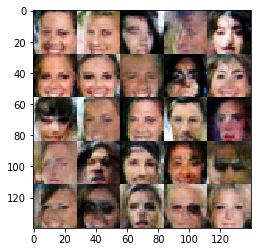

Epoch 1/1... Discriminator Loss: 2.2146... Generator Loss: 0.1591
Epoch 1/1... Discriminator Loss: 1.1137... Generator Loss: 0.5187
Epoch 1/1... Discriminator Loss: 1.2810... Generator Loss: 0.4257
Epoch 1/1... Discriminator Loss: 1.4444... Generator Loss: 0.3724
Epoch 1/1... Discriminator Loss: 1.4133... Generator Loss: 0.3918
Epoch 1/1... Discriminator Loss: 1.6835... Generator Loss: 0.2565
Epoch 1/1... Discriminator Loss: 3.1800... Generator Loss: 0.0687
Epoch 1/1... Discriminator Loss: 0.9695... Generator Loss: 2.9741
Epoch 1/1... Discriminator Loss: 3.7267... Generator Loss: 0.0353
Epoch 1/1... Discriminator Loss: 1.6906... Generator Loss: 0.2592


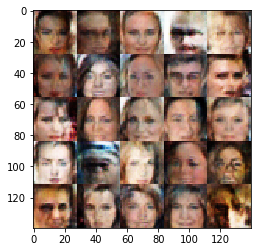

Epoch 1/1... Discriminator Loss: 1.8921... Generator Loss: 0.2369
Epoch 1/1... Discriminator Loss: 1.8897... Generator Loss: 0.2314
Epoch 1/1... Discriminator Loss: 2.6900... Generator Loss: 0.0876
Epoch 1/1... Discriminator Loss: 0.9199... Generator Loss: 1.1321
Epoch 1/1... Discriminator Loss: 0.8929... Generator Loss: 0.7772
Epoch 1/1... Discriminator Loss: 0.9735... Generator Loss: 0.6665
Epoch 1/1... Discriminator Loss: 2.6739... Generator Loss: 0.0938
Epoch 1/1... Discriminator Loss: 3.0612... Generator Loss: 0.0563
Epoch 1/1... Discriminator Loss: 1.4246... Generator Loss: 0.4435
Epoch 1/1... Discriminator Loss: 2.9847... Generator Loss: 0.0791


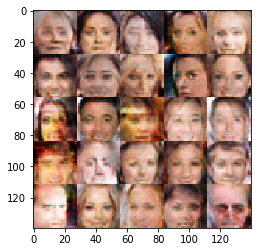

Epoch 1/1... Discriminator Loss: 1.3922... Generator Loss: 0.4308
Epoch 1/1... Discriminator Loss: 1.4776... Generator Loss: 0.3699
Epoch 1/1... Discriminator Loss: 1.6312... Generator Loss: 0.2748
Epoch 1/1... Discriminator Loss: 1.5881... Generator Loss: 0.2885
Epoch 1/1... Discriminator Loss: 1.0960... Generator Loss: 0.6089
Epoch 1/1... Discriminator Loss: 2.8258... Generator Loss: 0.0978
Epoch 1/1... Discriminator Loss: 2.5679... Generator Loss: 4.4933
Epoch 1/1... Discriminator Loss: 1.2204... Generator Loss: 0.4869
Epoch 1/1... Discriminator Loss: 1.0384... Generator Loss: 0.5605
Epoch 1/1... Discriminator Loss: 4.8243... Generator Loss: 0.0119


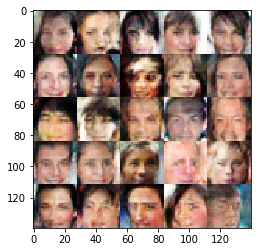

Epoch 1/1... Discriminator Loss: 0.9718... Generator Loss: 0.5832
Epoch 1/1... Discriminator Loss: 2.7270... Generator Loss: 0.0868
Epoch 1/1... Discriminator Loss: 0.6987... Generator Loss: 1.6308
Epoch 1/1... Discriminator Loss: 1.6544... Generator Loss: 0.2748
Epoch 1/1... Discriminator Loss: 3.0257... Generator Loss: 0.0612
Epoch 1/1... Discriminator Loss: 2.1097... Generator Loss: 0.1965
Epoch 1/1... Discriminator Loss: 0.7347... Generator Loss: 0.9677
Epoch 1/1... Discriminator Loss: 1.2704... Generator Loss: 3.9352
Epoch 1/1... Discriminator Loss: 1.7785... Generator Loss: 0.2378
Epoch 1/1... Discriminator Loss: 1.3866... Generator Loss: 0.3746


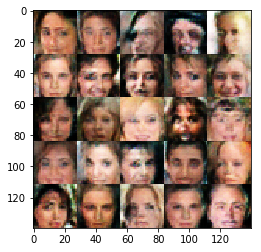

Epoch 1/1... Discriminator Loss: 0.6968... Generator Loss: 1.5013
Epoch 1/1... Discriminator Loss: 0.7970... Generator Loss: 0.8664
Epoch 1/1... Discriminator Loss: 3.3125... Generator Loss: 0.0538
Epoch 1/1... Discriminator Loss: 1.4356... Generator Loss: 0.3833
Epoch 1/1... Discriminator Loss: 1.9586... Generator Loss: 0.2374
Epoch 1/1... Discriminator Loss: 0.9863... Generator Loss: 0.6121
Epoch 1/1... Discriminator Loss: 2.2828... Generator Loss: 0.1377
Epoch 1/1... Discriminator Loss: 3.7060... Generator Loss: 0.0348
Epoch 1/1... Discriminator Loss: 0.5410... Generator Loss: 2.3019
Epoch 1/1... Discriminator Loss: 2.1539... Generator Loss: 0.1571


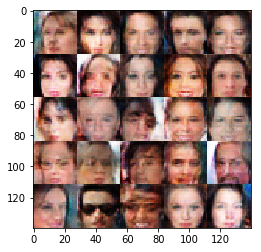

Epoch 1/1... Discriminator Loss: 1.1683... Generator Loss: 0.4729
Epoch 1/1... Discriminator Loss: 1.9086... Generator Loss: 0.2394
Epoch 1/1... Discriminator Loss: 1.7828... Generator Loss: 3.6959
Epoch 1/1... Discriminator Loss: 1.7683... Generator Loss: 0.2384
Epoch 1/1... Discriminator Loss: 0.9841... Generator Loss: 0.6535
Epoch 1/1... Discriminator Loss: 2.1492... Generator Loss: 0.1544
Epoch 1/1... Discriminator Loss: 1.8510... Generator Loss: 0.2143
Epoch 1/1... Discriminator Loss: 0.3665... Generator Loss: 1.5982
Epoch 1/1... Discriminator Loss: 2.3957... Generator Loss: 0.1292
Epoch 1/1... Discriminator Loss: 1.2043... Generator Loss: 0.5199


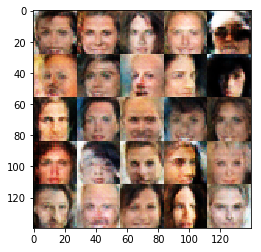

Epoch 1/1... Discriminator Loss: 0.4033... Generator Loss: 1.5034
Epoch 1/1... Discriminator Loss: 2.5643... Generator Loss: 0.1065
Epoch 1/1... Discriminator Loss: 2.3272... Generator Loss: 0.1464
Epoch 1/1... Discriminator Loss: 3.3753... Generator Loss: 0.0593
Epoch 1/1... Discriminator Loss: 2.4641... Generator Loss: 0.1160
Epoch 1/1... Discriminator Loss: 2.5351... Generator Loss: 0.1123
Epoch 1/1... Discriminator Loss: 0.7854... Generator Loss: 3.5145
Epoch 1/1... Discriminator Loss: 2.3756... Generator Loss: 0.1292
Epoch 1/1... Discriminator Loss: 3.2224... Generator Loss: 0.0539
Epoch 1/1... Discriminator Loss: 2.7067... Generator Loss: 0.0859


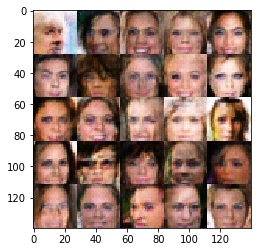

Epoch 1/1... Discriminator Loss: 0.8866... Generator Loss: 0.7907
Epoch 1/1... Discriminator Loss: 1.5958... Generator Loss: 0.3163
Epoch 1/1... Discriminator Loss: 1.0861... Generator Loss: 0.5535
Epoch 1/1... Discriminator Loss: 0.9471... Generator Loss: 0.7996
Epoch 1/1... Discriminator Loss: 0.9673... Generator Loss: 0.7285
Epoch 1/1... Discriminator Loss: 2.2029... Generator Loss: 0.1554
Epoch 1/1... Discriminator Loss: 0.6536... Generator Loss: 2.5226
Epoch 1/1... Discriminator Loss: 1.6959... Generator Loss: 0.3037
Epoch 1/1... Discriminator Loss: 1.3147... Generator Loss: 0.4114
Epoch 1/1... Discriminator Loss: 0.8432... Generator Loss: 1.5206


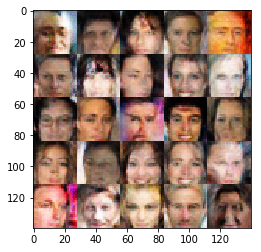

Epoch 1/1... Discriminator Loss: 0.6460... Generator Loss: 1.3183
Epoch 1/1... Discriminator Loss: 2.4678... Generator Loss: 0.1079
Epoch 1/1... Discriminator Loss: 0.6526... Generator Loss: 1.0011
Epoch 1/1... Discriminator Loss: 0.6243... Generator Loss: 1.0493
Epoch 1/1... Discriminator Loss: 2.0683... Generator Loss: 0.1797
Epoch 1/1... Discriminator Loss: 1.2070... Generator Loss: 0.4658
Epoch 1/1... Discriminator Loss: 2.2219... Generator Loss: 0.1601
Epoch 1/1... Discriminator Loss: 1.4928... Generator Loss: 0.3441
Epoch 1/1... Discriminator Loss: 1.6899... Generator Loss: 0.2589
Epoch 1/1... Discriminator Loss: 0.4142... Generator Loss: 2.1704


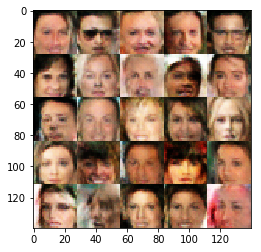

Epoch 1/1... Discriminator Loss: 0.4775... Generator Loss: 1.1892
Epoch 1/1... Discriminator Loss: 0.6513... Generator Loss: 1.0927
Epoch 1/1... Discriminator Loss: 1.2441... Generator Loss: 0.3992
Epoch 1/1... Discriminator Loss: 3.1831... Generator Loss: 0.0513
Epoch 1/1... Discriminator Loss: 0.6513... Generator Loss: 1.1069
Epoch 1/1... Discriminator Loss: 1.4581... Generator Loss: 0.4168
Epoch 1/1... Discriminator Loss: 0.4952... Generator Loss: 3.2306
Epoch 1/1... Discriminator Loss: 3.1990... Generator Loss: 0.0547
Epoch 1/1... Discriminator Loss: 3.1137... Generator Loss: 0.0588
Epoch 1/1... Discriminator Loss: 1.8461... Generator Loss: 0.2178


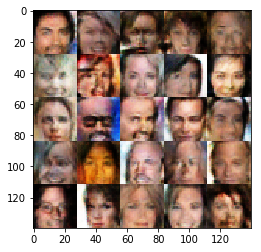

Epoch 1/1... Discriminator Loss: 2.2412... Generator Loss: 0.1369
Epoch 1/1... Discriminator Loss: 0.7677... Generator Loss: 1.0628
Epoch 1/1... Discriminator Loss: 0.9360... Generator Loss: 0.6556
Epoch 1/1... Discriminator Loss: 0.7242... Generator Loss: 1.3297
Epoch 1/1... Discriminator Loss: 0.6132... Generator Loss: 1.5619
Epoch 1/1... Discriminator Loss: 0.9840... Generator Loss: 0.5919
Epoch 1/1... Discriminator Loss: 0.7759... Generator Loss: 0.8607
Epoch 1/1... Discriminator Loss: 2.1284... Generator Loss: 0.1535
Epoch 1/1... Discriminator Loss: 2.4961... Generator Loss: 0.1127
Epoch 1/1... Discriminator Loss: 0.6818... Generator Loss: 1.0840


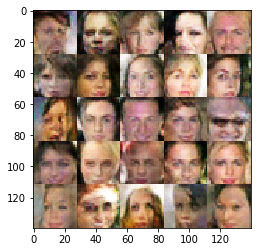

Epoch 1/1... Discriminator Loss: 0.6237... Generator Loss: 0.8897
Epoch 1/1... Discriminator Loss: 1.6470... Generator Loss: 0.3038
Epoch 1/1... Discriminator Loss: 0.8584... Generator Loss: 4.5380
Epoch 1/1... Discriminator Loss: 0.5075... Generator Loss: 1.5348
Epoch 1/1... Discriminator Loss: 0.9320... Generator Loss: 0.7043
Epoch 1/1... Discriminator Loss: 2.3492... Generator Loss: 0.1431
Epoch 1/1... Discriminator Loss: 1.2029... Generator Loss: 0.4563
Epoch 1/1... Discriminator Loss: 1.0199... Generator Loss: 5.0351
Epoch 1/1... Discriminator Loss: 1.6166... Generator Loss: 0.3095
Epoch 1/1... Discriminator Loss: 1.9829... Generator Loss: 0.1905


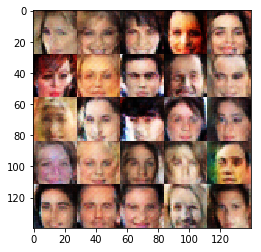

Epoch 1/1... Discriminator Loss: 2.8476... Generator Loss: 0.0738
Epoch 1/1... Discriminator Loss: 2.5293... Generator Loss: 0.1094
Epoch 1/1... Discriminator Loss: 2.0459... Generator Loss: 0.2536
Epoch 1/1... Discriminator Loss: 0.9245... Generator Loss: 0.6070
Epoch 1/1... Discriminator Loss: 3.3473... Generator Loss: 0.0499
Epoch 1/1... Discriminator Loss: 1.9069... Generator Loss: 0.2473
Epoch 1/1... Discriminator Loss: 3.8245... Generator Loss: 0.0315
Epoch 1/1... Discriminator Loss: 2.6284... Generator Loss: 0.1444
Epoch 1/1... Discriminator Loss: 1.5558... Generator Loss: 0.2972
Epoch 1/1... Discriminator Loss: 1.0333... Generator Loss: 0.5631


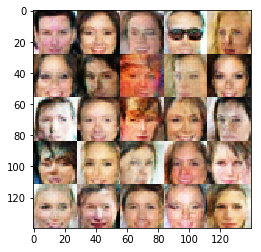

Epoch 1/1... Discriminator Loss: 3.1267... Generator Loss: 0.0568
Epoch 1/1... Discriminator Loss: 3.1082... Generator Loss: 0.0648
Epoch 1/1... Discriminator Loss: 1.8948... Generator Loss: 0.2501
Epoch 1/1... Discriminator Loss: 0.4594... Generator Loss: 1.2184
Epoch 1/1... Discriminator Loss: 0.3313... Generator Loss: 1.9159
Epoch 1/1... Discriminator Loss: 1.6431... Generator Loss: 0.3242
Epoch 1/1... Discriminator Loss: 0.7038... Generator Loss: 1.4038
Epoch 1/1... Discriminator Loss: 1.5212... Generator Loss: 0.3090
Epoch 1/1... Discriminator Loss: 0.7276... Generator Loss: 0.8440
Epoch 1/1... Discriminator Loss: 2.3671... Generator Loss: 0.1439


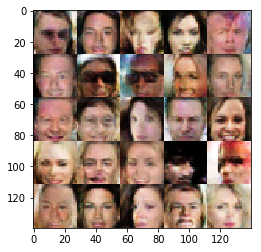

Epoch 1/1... Discriminator Loss: 1.0591... Generator Loss: 0.6109
Epoch 1/1... Discriminator Loss: 1.1955... Generator Loss: 0.4789
Epoch 1/1... Discriminator Loss: 3.0259... Generator Loss: 0.0608
Epoch 1/1... Discriminator Loss: 2.1105... Generator Loss: 0.1939
Epoch 1/1... Discriminator Loss: 1.1434... Generator Loss: 0.5566
Epoch 1/1... Discriminator Loss: 0.5697... Generator Loss: 2.3494
Epoch 1/1... Discriminator Loss: 1.5526... Generator Loss: 0.3369
Epoch 1/1... Discriminator Loss: 2.6418... Generator Loss: 0.1036
Epoch 1/1... Discriminator Loss: 0.9260... Generator Loss: 0.6400
Epoch 1/1... Discriminator Loss: 1.1576... Generator Loss: 0.5523


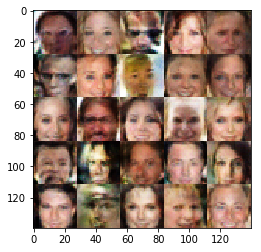

Epoch 1/1... Discriminator Loss: 1.3111... Generator Loss: 0.4721
Epoch 1/1... Discriminator Loss: 0.5312... Generator Loss: 1.2027
Epoch 1/1... Discriminator Loss: 0.8706... Generator Loss: 3.0992
Epoch 1/1... Discriminator Loss: 2.6692... Generator Loss: 0.1103
Epoch 1/1... Discriminator Loss: 1.8938... Generator Loss: 0.1919
Epoch 1/1... Discriminator Loss: 3.5381... Generator Loss: 0.0550
Epoch 1/1... Discriminator Loss: 0.9125... Generator Loss: 0.8023
Epoch 1/1... Discriminator Loss: 3.7411... Generator Loss: 0.0344
Epoch 1/1... Discriminator Loss: 1.8083... Generator Loss: 0.2804
Epoch 1/1... Discriminator Loss: 0.7625... Generator Loss: 2.7453


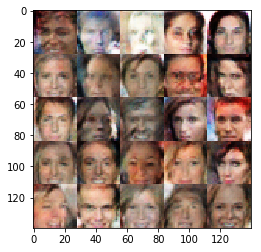

Epoch 1/1... Discriminator Loss: 0.6844... Generator Loss: 1.1708
Epoch 1/1... Discriminator Loss: 2.6603... Generator Loss: 0.1148
Epoch 1/1... Discriminator Loss: 3.9064... Generator Loss: 0.0280
Epoch 1/1... Discriminator Loss: 2.5491... Generator Loss: 0.1256
Epoch 1/1... Discriminator Loss: 0.6047... Generator Loss: 0.9814
Epoch 1/1... Discriminator Loss: 1.8359... Generator Loss: 0.2088
Epoch 1/1... Discriminator Loss: 2.5801... Generator Loss: 0.1098
Epoch 1/1... Discriminator Loss: 1.2610... Generator Loss: 6.7684
Epoch 1/1... Discriminator Loss: 0.5966... Generator Loss: 3.6333
Epoch 1/1... Discriminator Loss: 2.1267... Generator Loss: 0.1693


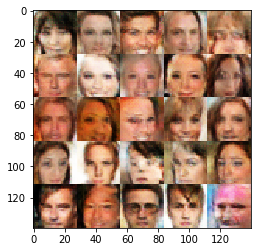

Epoch 1/1... Discriminator Loss: 1.4671... Generator Loss: 0.3926
Epoch 1/1... Discriminator Loss: 0.7399... Generator Loss: 0.7391
Epoch 1/1... Discriminator Loss: 0.4256... Generator Loss: 1.4061
Epoch 1/1... Discriminator Loss: 2.5643... Generator Loss: 0.1269
Epoch 1/1... Discriminator Loss: 0.4698... Generator Loss: 1.2918
Epoch 1/1... Discriminator Loss: 1.9247... Generator Loss: 0.1969
Epoch 1/1... Discriminator Loss: 2.8140... Generator Loss: 0.1232
Epoch 1/1... Discriminator Loss: 3.5623... Generator Loss: 0.0398
Epoch 1/1... Discriminator Loss: 0.8128... Generator Loss: 0.8602
Epoch 1/1... Discriminator Loss: 0.7983... Generator Loss: 0.7292


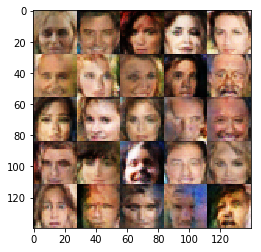

Epoch 1/1... Discriminator Loss: 2.8860... Generator Loss: 0.0740
Epoch 1/1... Discriminator Loss: 1.6905... Generator Loss: 0.2472
Epoch 1/1... Discriminator Loss: 0.9556... Generator Loss: 0.5615
Epoch 1/1... Discriminator Loss: 0.4394... Generator Loss: 4.7773
Epoch 1/1... Discriminator Loss: 1.0191... Generator Loss: 0.5423
Epoch 1/1... Discriminator Loss: 2.1552... Generator Loss: 0.1804
Epoch 1/1... Discriminator Loss: 2.0961... Generator Loss: 0.1990
Epoch 1/1... Discriminator Loss: 2.9045... Generator Loss: 0.0675
Epoch 1/1... Discriminator Loss: 3.4830... Generator Loss: 0.0526
Epoch 1/1... Discriminator Loss: 0.7611... Generator Loss: 4.5294


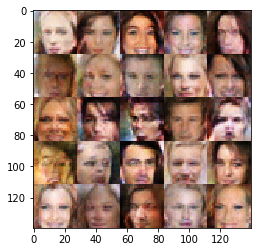

Epoch 1/1... Discriminator Loss: 2.5566... Generator Loss: 0.1226
Epoch 1/1... Discriminator Loss: 1.5585... Generator Loss: 0.2664
Epoch 1/1... Discriminator Loss: 0.4213... Generator Loss: 1.5719
Epoch 1/1... Discriminator Loss: 2.0130... Generator Loss: 0.2048
Epoch 1/1... Discriminator Loss: 1.2071... Generator Loss: 0.4930
Epoch 1/1... Discriminator Loss: 0.5169... Generator Loss: 1.2132
Epoch 1/1... Discriminator Loss: 0.3785... Generator Loss: 3.9724
Epoch 1/1... Discriminator Loss: 0.6984... Generator Loss: 0.9579
Epoch 1/1... Discriminator Loss: 1.8257... Generator Loss: 0.3142
Epoch 1/1... Discriminator Loss: 3.2253... Generator Loss: 0.0750


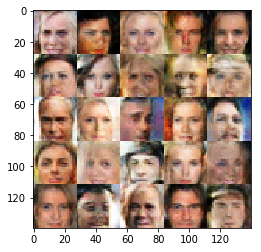

Epoch 1/1... Discriminator Loss: 1.0674... Generator Loss: 0.6146
Epoch 1/1... Discriminator Loss: 1.0643... Generator Loss: 0.5595
Epoch 1/1... Discriminator Loss: 4.2509... Generator Loss: 0.0202
Epoch 1/1... Discriminator Loss: 1.2035... Generator Loss: 0.5201
Epoch 1/1... Discriminator Loss: 1.5141... Generator Loss: 0.4324
Epoch 1/1... Discriminator Loss: 0.7447... Generator Loss: 5.4687
Epoch 1/1... Discriminator Loss: 1.1766... Generator Loss: 0.5282
Epoch 1/1... Discriminator Loss: 2.1850... Generator Loss: 0.1755
Epoch 1/1... Discriminator Loss: 1.7161... Generator Loss: 0.3236
Epoch 1/1... Discriminator Loss: 3.3644... Generator Loss: 0.0468


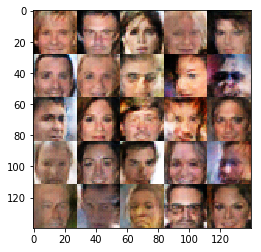

Epoch 1/1... Discriminator Loss: 0.9920... Generator Loss: 0.6360
Epoch 1/1... Discriminator Loss: 1.5833... Generator Loss: 0.2958
Epoch 1/1... Discriminator Loss: 0.2030... Generator Loss: 3.1724
Epoch 1/1... Discriminator Loss: 0.4606... Generator Loss: 4.0806
Epoch 1/1... Discriminator Loss: 2.6947... Generator Loss: 0.0997
Epoch 1/1... Discriminator Loss: 1.1778... Generator Loss: 0.4181
Epoch 1/1... Discriminator Loss: 1.6262... Generator Loss: 0.2751
Epoch 1/1... Discriminator Loss: 1.0126... Generator Loss: 0.5401
Epoch 1/1... Discriminator Loss: 1.0613... Generator Loss: 0.5091
Epoch 1/1... Discriminator Loss: 2.7163... Generator Loss: 0.1090


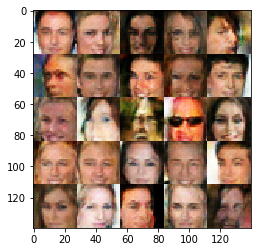

Epoch 1/1... Discriminator Loss: 1.6874... Generator Loss: 0.3104
Epoch 1/1... Discriminator Loss: 0.8958... Generator Loss: 0.6303
Epoch 1/1... Discriminator Loss: 0.4606... Generator Loss: 1.5106
Epoch 1/1... Discriminator Loss: 0.2432... Generator Loss: 1.7505
Epoch 1/1... Discriminator Loss: 2.7954... Generator Loss: 0.1151
Epoch 1/1... Discriminator Loss: 0.5743... Generator Loss: 2.3798
Epoch 1/1... Discriminator Loss: 2.7215... Generator Loss: 0.0989
Epoch 1/1... Discriminator Loss: 3.7395... Generator Loss: 0.0385
Epoch 1/1... Discriminator Loss: 0.9557... Generator Loss: 0.6745
Epoch 1/1... Discriminator Loss: 2.2929... Generator Loss: 0.1476


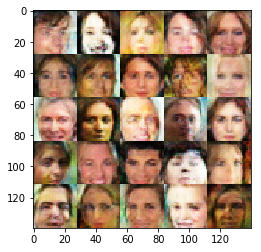

Epoch 1/1... Discriminator Loss: 0.8788... Generator Loss: 0.6924
Epoch 1/1... Discriminator Loss: 1.0880... Generator Loss: 0.5118
Epoch 1/1... Discriminator Loss: 1.4410... Generator Loss: 0.3838
Epoch 1/1... Discriminator Loss: 3.5796... Generator Loss: 0.0428
Epoch 1/1... Discriminator Loss: 0.9032... Generator Loss: 0.8366
Epoch 1/1... Discriminator Loss: 2.0428... Generator Loss: 0.1905
Epoch 1/1... Discriminator Loss: 0.8330... Generator Loss: 0.7619
Epoch 1/1... Discriminator Loss: 1.5714... Generator Loss: 0.3058
Epoch 1/1... Discriminator Loss: 0.4234... Generator Loss: 1.7372
Epoch 1/1... Discriminator Loss: 3.3542... Generator Loss: 0.0706


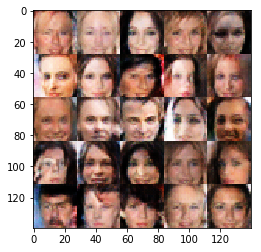

Epoch 1/1... Discriminator Loss: 1.7502... Generator Loss: 0.2648
Epoch 1/1... Discriminator Loss: 1.4470... Generator Loss: 0.3400
Epoch 1/1... Discriminator Loss: 1.0895... Generator Loss: 0.5440
Epoch 1/1... Discriminator Loss: 1.9248... Generator Loss: 0.2181
Epoch 1/1... Discriminator Loss: 0.6605... Generator Loss: 0.8680
Epoch 1/1... Discriminator Loss: 1.4829... Generator Loss: 0.3661
Epoch 1/1... Discriminator Loss: 2.7034... Generator Loss: 0.1478
Epoch 1/1... Discriminator Loss: 1.6092... Generator Loss: 0.3069
Epoch 1/1... Discriminator Loss: 1.3430... Generator Loss: 0.4465
Epoch 1/1... Discriminator Loss: 1.4190... Generator Loss: 0.3590


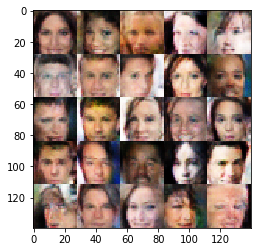

Epoch 1/1... Discriminator Loss: 3.1880... Generator Loss: 0.0575
Epoch 1/1... Discriminator Loss: 3.7394... Generator Loss: 0.0361
Epoch 1/1... Discriminator Loss: 0.3726... Generator Loss: 1.6741
Epoch 1/1... Discriminator Loss: 0.2952... Generator Loss: 2.5983
Epoch 1/1... Discriminator Loss: 0.2644... Generator Loss: 2.7533
Epoch 1/1... Discriminator Loss: 3.7565... Generator Loss: 0.0371
Epoch 1/1... Discriminator Loss: 2.3095... Generator Loss: 0.1917
Epoch 1/1... Discriminator Loss: 0.8568... Generator Loss: 0.7579
Epoch 1/1... Discriminator Loss: 0.6226... Generator Loss: 1.0552
Epoch 1/1... Discriminator Loss: 0.9723... Generator Loss: 0.6539


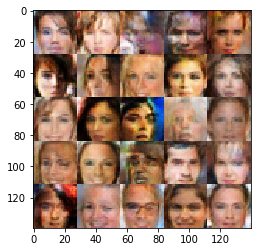

Epoch 1/1... Discriminator Loss: 1.5072... Generator Loss: 0.3710
Epoch 1/1... Discriminator Loss: 1.7205... Generator Loss: 0.2706
Epoch 1/1... Discriminator Loss: 2.5384... Generator Loss: 0.1419


In [37]:
batch_size = 32
z_dim = 100
learning_rate = 0.002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.